# NYC Restaurant Inspection Data Analysis

This notebook provides an analysis of NYC restaurant inspection data, focusing on trends, insights, and potential areas for improvement. The analysis includes data cleaning, exploration, visualization, and modeling.


In [1]:
# Import necessary libraries for the analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Import necessary libraries for the analysis
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Replace 'your_file_name.csv' with the actual name of your file
file_path = '/content/drive/MyDrive/Colab Notebooks/DOHMH New York City Restaurant Inspection Results/DOHMH_New_York_City_Restaurant_Inspection_Results_20241118.csv'

# Load the CSV into a pandas DataFrame
df = pd.read_csv(file_path)


# 1. Understanding the data

In [4]:
df

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50099353,LA AURORA,Queens,23917,BRADDOCK AVE,11426.0,7183474271,Spanish,12/22/2023,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.726551,-73.728606,413.0,23.0,162100.0,4167536.0,4.079870e+09,QN43,NaN
1,50118899,MAMA'S RESTAURANT,Queens,3708,73RD ST,11372.0,3478917275,Bangladeshi,05/10/2023,Violations were cited in the following area(s).,...,Pre-permit (Operational) / Re-inspection,40.748445,-73.892648,403.0,25.0,29100.0,4454471.0,4.012830e+09,QN28,NaN
2,50154609,CAFFE BUON GUSTO,Brooklyn,121,ATLANTIC AVENUE,11201.0,9177437763,NaN,01/01/1900,NaN,...,NaN,40.690679,-73.995947,302.0,33.0,700.0,3002745.0,3.002750e+09,BK09,NaN
3,50108824,NY 99 CENTS FRESH PIZZA,Manhattan,12,PERRY STREET,10014.0,9172922325,Pizza,09/26/2024,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.735825,-74.001259,102.0,3.0,7100.0,1010884.0,1.006120e+09,MN23,NaN
4,50122063,RUFFIAN,Manhattan,125,EAST 7 STREET,10009.0,2127770855,NaN,01/01/1900,NaN,...,NaN,40.726379,-73.984309,103.0,2.0,3200.0,1005846.0,1.004350e+09,MN22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258811,50129333,CAFE BLOOM,Manhattan,4394,BROADWAY,10040.0,6464840067,Coffee/Tea,11/07/2024,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.854651,-73.933530,112.0,10.0,27900.0,1064038.0,1.021700e+09,MN35,NaN
258812,50057589,TOUS LES JOURS,Queens,3916,PRINCE ST,11354.0,7188881992,Bakery Products/Desserts,01/27/2022,Violations were cited in the following area(s).,...,Cycle Inspection / Re-inspection,40.759478,-73.832243,407.0,20.0,87100.0,4539244.0,4.049738e+09,QN22,NaN
258813,50105466,LE PAIN QUOTIDIEN,Manhattan,41,W 40TH ST,10018.0,6462767589,Other,06/25/2024,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.753069,-73.983881,105.0,4.0,8400.0,NaN,1.000000e+00,MN17,NaN
258814,50136591,J & C RESTAURANT BAR,Queens,3761,79TH ST,11372.0,7188030284,Spanish,10/10/2024,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.749090,-73.887023,403.0,25.0,28500.0,4029981.0,4.012900e+09,QN28,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258816 entries, 0 to 258815
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  258816 non-null  int64  
 1   DBA                    257859 non-null  object 
 2   BORO                   258816 non-null  object 
 3   BUILDING               258444 non-null  object 
 4   STREET                 258813 non-null  object 
 5   ZIPCODE                256155 non-null  float64
 6   PHONE                  258813 non-null  object 
 7   CUISINE DESCRIPTION    256002 non-null  object 
 8   INSPECTION DATE        258816 non-null  object 
 9   ACTION                 256002 non-null  object 
 10  VIOLATION CODE         254404 non-null  object 
 11  VIOLATION DESCRIPTION  254404 non-null  object 
 12  CRITICAL FLAG          258816 non-null  object 
 13  SCORE                  246084 non-null  float64
 14  GRADE                  124802 non-nu

In [6]:
df.isnull().sum()

,0
CAMIS,0
DBA,957
BORO,0
BUILDING,372
STREET,3
ZIPCODE,2661
PHONE,3
CUISINE DESCRIPTION,2814
INSPECTION DATE,0
ACTION,2814


In [7]:
df.dtypes

,0
CAMIS,int64
DBA,object
BORO,object
BUILDING,object
STREET,object
ZIPCODE,float64
PHONE,object
CUISINE DESCRIPTION,object
INSPECTION DATE,object
ACTION,object


In [8]:
# Display basic statistics and explore the first few rows of the data
df.describe()

,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,Location Point1
count,2.588160e+05,256155.000000,246084.000000,258463.000000,258463.000000,255520.000000,255530.000000,255530.000000,2.542070e+05,2.581780e+05,0.0
mean,4.772941e+07,10708.653487,24.074824,40.307614,-73.181514,254.988525,20.907479,29811.127355,2.582210e+06,2.475830e+09,NaN
std,3.943760e+06,593.575841,18.196509,4.109325,7.460152,129.905948,15.851973,31248.442914,1.346268e+06,1.332922e+09,NaN
min,3.007544e+07,8512.000000,0.000000,0.000000,-74.249101,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00,NaN
25%,4.169281e+07,10023.000000,12.000000,40.683450,-73.989205,106.000000,4.000000,8000.000000,1.051663e+06,1.011200e+09,NaN
50%,5.007576e+07,11101.000000,20.000000,40.730111,-73.957153,302.000000,20.000000,17200.000000,3.022088e+06,3.008080e+09,NaN
75%,5.011517e+07,11231.000000,32.000000,40.760738,-73.896942,401.000000,34.000000,42200.000000,4.007902e+06,4.005340e+09,NaN
max,5.016200e+07,14057.000000,168.000000,40.912822,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09,NaN


# **2. Data cleaning**

## 1. Columns with few nulls

In [9]:
# Display basic statistics and explore the first few rows of the data
# Convert all column names to lowercase
df.columns = df.columns.str.lower()

# Display the updated DataFrame
df.head()


,camis,dba,boro,building,street,zipcode,phone,cuisine description,inspection date,action,...,inspection type,latitude,longitude,community board,council district,census tract,bin,bbl,nta,location point1
0,50099353,LA AURORA,Queens,23917,BRADDOCK AVE,11426.0,7183474271,Spanish,12/22/2023,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.726551,-73.728606,413.0,23.0,162100.0,4167536.0,4.079870e+09,QN43,NaN
1,50118899,MAMA'S RESTAURANT,Queens,3708,73RD ST,11372.0,3478917275,Bangladeshi,05/10/2023,Violations were cited in the following area(s).,...,Pre-permit (Operational) / Re-inspection,40.748445,-73.892648,403.0,25.0,29100.0,4454471.0,4.012830e+09,QN28,NaN
2,50154609,CAFFE BUON GUSTO,Brooklyn,121,ATLANTIC AVENUE,11201.0,9177437763,NaN,01/01/1900,NaN,...,NaN,40.690679,-73.995947,302.0,33.0,700.0,3002745.0,3.002750e+09,BK09,NaN
3,50108824,NY 99 CENTS FRESH PIZZA,Manhattan,12,PERRY STREET,10014.0,9172922325,Pizza,09/26/2024,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.735825,-74.001259,102.0,3.0,7100.0,1010884.0,1.006120e+09,MN23,NaN
4,50122063,RUFFIAN,Manhattan,125,EAST 7 STREET,10009.0,2127770855,NaN,01/01/1900,NaN,...,NaN,40.726379,-73.984309,103.0,2.0,3200.0,1005846.0,1.004350e+09,MN22,NaN


In [10]:
# Perform data cleaning steps to handle missing or inconsistent values
df['dba'].fillna('Unknown DBA', inplace=True)

<ipython-input-10-95b0e15eb0a6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dba'].fillna('Unknown DBA', inplace=True)


In [11]:
# Perform data cleaning steps to handle missing or inconsistent values
df['building'].fillna('Unknown', inplace=True)

<ipython-input-11-47df2fe2a275>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['building'].fillna('Unknown', inplace=True)


In [12]:
# Perform data cleaning steps to handle missing or inconsistent values
df = df.dropna(subset=['latitude', 'longitude'])

In [13]:
# Perform data cleaning steps to handle missing or inconsistent values
df.drop(columns='phone', inplace=True)

<ipython-input-13-86855b03f279>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='phone', inplace=True)


## 2. Columns with moderate nulls

In [14]:
# Perform data cleaning steps to handle missing or inconsistent values
df['zipcode'].fillna('Unknown', inplace=True)

<ipython-input-14-97243915bfb8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['zipcode'].fillna('Unknown', inplace=True)
<ipython-input-14-97243915bfb8>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['zipcode'].fillna('Unknown', inplace=True)
<ipython-input-14-97243915bfb8>:2: SettingWithCopyWarning: 
A value is trying to be set on a co

In [15]:
# Perform data cleaning steps to handle missing or inconsistent values
df['cuisine description'].fillna('Unknown Cuisine', inplace=True)

<ipython-input-15-d52f4625f1e8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cuisine description'].fillna('Unknown Cuisine', inplace=True)
<ipython-input-15-d52f4625f1e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cuisine description'].fillna('Unknown Cuisine', inplace=True)


## 3. Columns with many nulls

In [16]:
# Perform data cleaning steps to handle missing or inconsistent values
df = df.dropna(subset=['grade', 'grade date'])

In [17]:
# Perform data cleaning steps to handle missing or inconsistent values
df = df.dropna(subset=['score'])

In [18]:
# Perform data cleaning steps to handle missing or inconsistent values
df = df.dropna(subset=['violation code', 'violation description'])

## 4. Columns with very high nulls

In [19]:
# Perform data cleaning steps to handle missing or inconsistent values
df.drop(columns=['community board', 'council district', 'census tract', 'bin', 'bbl', 'nta'], inplace=True)

<ipython-input-19-a01b7a6fd358>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['community board', 'council district', 'census tract', 'bin', 'bbl', 'nta'], inplace=True)


# Validating the dataset

In [20]:
df.isnull().sum()

,0
camis,0
dba,0
boro,0
building,0
street,0
zipcode,0
cuisine description,0
inspection date,0
action,0
violation code,0


In [21]:
df.shape

(114796, 20)

In [22]:
df.dtypes

,0
camis,int64
dba,object
boro,object
building,object
street,object
zipcode,object
cuisine description,object
inspection date,object
action,object
violation code,object


In [23]:
# Adjust data types
df['camis'] = df['camis'].astype(int)
df['dba'] = df['dba'].astype(str)
df['boro'] = df['boro'].astype('category')
df['building'] = df['building'].astype(str)
df['street'] = df['street'].astype(str)
df['zipcode'] = df['zipcode'].astype(str)
df['inspection date'] = pd.to_datetime(df['inspection date'], errors='coerce')
df['critical flag'] = df['critical flag'].astype('category')
df['record date'] = pd.to_datetime(df['record date'], errors='coerce')
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
df['cuisine description'] = df['cuisine description'].astype('category')
df['action'] = df['action'].astype(str)
df['score'] = pd.to_numeric(df['score'], errors='coerce')
df['grade'] = df['grade'].astype('category')
df['grade date'] = pd.to_datetime(df['grade date'], errors='coerce')
df['inspection type'] = df['inspection type'].astype('category')
df['violation code'] = df['violation code'].astype(str)
df['violation description'] = df['violation description'].astype(str)

In [24]:
df.dtypes

,0
camis,int64
dba,object
boro,category
building,object
street,object
zipcode,object
cuisine description,category
inspection date,datetime64[ns]
action,object
violation code,object


In [25]:
print(df.memory_usage(deep=True))


Index                      918368
camis                      918368
dba                       8377034
boro                       115294
building                  6940494
street                    8040084
zipcode                   7346944
cuisine description        122884
inspection date            918368
action                   11916858
violation code            6888672
violation description    28369201
critical flag              115038
score                      918368
grade                      115316
grade date                 918368
record date                918368
inspection type            115550
latitude                   918368
longitude                  918368
location point1            918368
dtype: int64


In [26]:
# Check for duplicate rows
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 0


In [27]:
# Perform data cleaning steps to handle missing or inconsistent values
df = df.drop_duplicates()
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Number of rows after removing duplicates: 114796


In [28]:
df['dba'] = df['dba'].str.strip().str.lower()
df['boro'] = df['boro'].str.strip().str.lower()

In [29]:
print(f"Remaining duplicate rows: {df.duplicated().sum()}")

Remaining duplicate rows: 0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114796 entries, 1 to 258812
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   camis                  114796 non-null  int64         
 1   dba                    114796 non-null  object        
 2   boro                   114796 non-null  object        
 3   building               114796 non-null  object        
 4   street                 114796 non-null  object        
 5   zipcode                114796 non-null  object        
 6   cuisine description    114796 non-null  category      
 7   inspection date        114796 non-null  datetime64[ns]
 8   action                 114796 non-null  object        
 9   violation code         114796 non-null  object        
 10  violation description  114796 non-null  object        
 11  critical flag          114796 non-null  category      
 12  score                  114796 non-null  float64  

In [31]:
print(f"Unique CAMIS values: {df['camis'].nunique()} / Total rows: {df.shape[0]}")

Unique CAMIS values: 24238 / Total rows: 114796


What Does This Mean?

The dataset contains information for 24,223 unique establishments (restaurants), but since inspections are performed multiple times per restaurant, there are 114,796 total inspection records.

For example:

A single restaurant (with one CAMIS ID) might have multiple inspections over time, resulting in multiple rows in the dataset.

In [32]:
inspection_count = df.groupby('camis').size().sort_values(ascending=False)
inspection_count

,0
camis,
40365904,31
50089474,31
50111191,25
41561516,24
50111296,23
...,...
50079359,1
50139546,1
50139514,1


In [33]:
df['dba'] = df['dba'].str.title()
df['boro'] = df['boro'].str.title()
df

,camis,dba,boro,building,street,zipcode,cuisine description,inspection date,action,violation code,violation description,critical flag,score,grade,grade date,record date,inspection type,latitude,longitude,location point1
1,50118899,Mama'S Restaurant,Queens,3708,73RD ST,11372.0,Bangladeshi,2023-05-10,Violations were cited in the following area(s).,04A,Food Protection Certificate (FPC) not held by ...,Critical,53.0,C,2023-05-10,2024-11-18,Pre-permit (Operational) / Re-inspection,40.748445,-73.892648,NaN
13,50076228,Wah Sing Restaurant,Brooklyn,143,ROCKAWAY AVENUE,11233.0,Chinese,2023-05-03,Violations were cited in the following area(s).,04M,Live roaches in facility's food or non-food area.,Critical,9.0,A,2023-05-03,2024-11-18,Cycle Inspection / Initial Inspection,40.677862,-73.910777,NaN
15,50114731,Nura,Brooklyn,46,NORMAN AVENUE,11222.0,American,2023-02-03,Violations were cited in the following area(s).,06C,"Food, supplies, and equipment not protected fr...",Critical,7.0,A,2023-02-03,2024-11-18,Cycle Inspection / Initial Inspection,40.724746,-73.953780,NaN
18,41215734,Gyu-Kaku,Manhattan,805,3 AVENUE,10022.0,Japanese,2023-12-12,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,27.0,B,2023-12-12,2024-11-18,Cycle Inspection / Re-inspection,40.755499,-73.970980,NaN
20,50075766,Momo Crave,Queens,3807,69TH ST,11377.0,Asian/Asian Fusion,2022-06-25,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,5.0,A,2022-06-25,2024-11-18,Cycle Inspection / Initial Inspection,40.746892,-73.896425,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258804,50127731,Avocado Sushi,Staten Island,4906,ARTHUR KILL ROAD,10309.0,Japanese,2024-03-04,Violations were cited in the following area(s).,02B,Hot TCS food item not held at or above 140 °F.,Critical,11.0,A,2024-03-04,2024-11-18,Cycle Inspection / Re-inspection,40.522714,-74.239249,NaN
258806,50070527,Black Stone Coffee Roasters,Manhattan,502,HUDSON STREET,10014.0,American,2022-01-25,Violations were cited in the following area(s).,04J,Appropriately scaled metal stem-type thermomet...,Critical,0.0,A,2022-01-25,2024-11-18,Cycle Inspection / Re-inspection,40.733149,-74.006379,NaN
258810,50102277,Kung Fu Tea,Manhattan,73,CHRYSTIE STREET,10002.0,Coffee/Tea,2021-10-05,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,7.0,A,2021-10-05,2024-11-18,Pre-permit (Operational) / Initial Inspection,40.717147,-73.994372,NaN
258811,50129333,Cafe Bloom,Manhattan,4394,BROADWAY,10040.0,Coffee/Tea,2024-11-07,Violations were cited in the following area(s).,10F,Non-food contact surface or equipment made of ...,Not Critical,13.0,A,2024-11-07,2024-11-18,Cycle Inspection / Initial Inspection,40.854651,-73.933530,NaN


In [34]:
# Perform data cleaning steps to handle missing or inconsistent values
df.reset_index(drop=True, inplace=True)
df

,camis,dba,boro,building,street,zipcode,cuisine description,inspection date,action,violation code,violation description,critical flag,score,grade,grade date,record date,inspection type,latitude,longitude,location point1
0,50118899,Mama'S Restaurant,Queens,3708,73RD ST,11372.0,Bangladeshi,2023-05-10,Violations were cited in the following area(s).,04A,Food Protection Certificate (FPC) not held by ...,Critical,53.0,C,2023-05-10,2024-11-18,Pre-permit (Operational) / Re-inspection,40.748445,-73.892648,NaN
1,50076228,Wah Sing Restaurant,Brooklyn,143,ROCKAWAY AVENUE,11233.0,Chinese,2023-05-03,Violations were cited in the following area(s).,04M,Live roaches in facility's food or non-food area.,Critical,9.0,A,2023-05-03,2024-11-18,Cycle Inspection / Initial Inspection,40.677862,-73.910777,NaN
2,50114731,Nura,Brooklyn,46,NORMAN AVENUE,11222.0,American,2023-02-03,Violations were cited in the following area(s).,06C,"Food, supplies, and equipment not protected fr...",Critical,7.0,A,2023-02-03,2024-11-18,Cycle Inspection / Initial Inspection,40.724746,-73.953780,NaN
3,41215734,Gyu-Kaku,Manhattan,805,3 AVENUE,10022.0,Japanese,2023-12-12,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,27.0,B,2023-12-12,2024-11-18,Cycle Inspection / Re-inspection,40.755499,-73.970980,NaN
4,50075766,Momo Crave,Queens,3807,69TH ST,11377.0,Asian/Asian Fusion,2022-06-25,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,5.0,A,2022-06-25,2024-11-18,Cycle Inspection / Initial Inspection,40.746892,-73.896425,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114791,50127731,Avocado Sushi,Staten Island,4906,ARTHUR KILL ROAD,10309.0,Japanese,2024-03-04,Violations were cited in the following area(s).,02B,Hot TCS food item not held at or above 140 °F.,Critical,11.0,A,2024-03-04,2024-11-18,Cycle Inspection / Re-inspection,40.522714,-74.239249,NaN
114792,50070527,Black Stone Coffee Roasters,Manhattan,502,HUDSON STREET,10014.0,American,2022-01-25,Violations were cited in the following area(s).,04J,Appropriately scaled metal stem-type thermomet...,Critical,0.0,A,2022-01-25,2024-11-18,Cycle Inspection / Re-inspection,40.733149,-74.006379,NaN
114793,50102277,Kung Fu Tea,Manhattan,73,CHRYSTIE STREET,10002.0,Coffee/Tea,2021-10-05,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,7.0,A,2021-10-05,2024-11-18,Pre-permit (Operational) / Initial Inspection,40.717147,-73.994372,NaN
114794,50129333,Cafe Bloom,Manhattan,4394,BROADWAY,10040.0,Coffee/Tea,2024-11-07,Violations were cited in the following area(s).,10F,Non-food contact surface or equipment made of ...,Not Critical,13.0,A,2024-11-07,2024-11-18,Cycle Inspection / Initial Inspection,40.854651,-73.933530,NaN


In [35]:
unique_values = df['boro'].unique()
print(f"Unique values in 'boro': {unique_values}")


Unique values in 'boro': ['Queens' 'Brooklyn' 'Manhattan' 'Bronx' 'Staten Island']


# **Restaurant Industry Trends**

## **1. What are the most common health code violations among restaurants in NYC?**

In [36]:
unique_values_violation = df['violation code'].unique()
print(f"Unique values in 'violation_description': {unique_values_violation.shape[0]}")

Unique values in 'violation_description': 72


In [37]:
# Display basic statistics and explore the first few rows of the data
# Prepare data for plotting
violation_counts = df['violation code'].value_counts().head(20)
violation_code_data = violation_counts.reset_index()
violation_code_data.columns = ['Violation Code', 'Count']
violation_code_data

,Violation Code,Count
0,10F,23431
1,08A,10801
2,06D,9010
3,10B,8406
4,06C,6958
5,04L,6212
6,02G,6201
7,02B,5699
8,04N,4728
9,04A,2782


<ipython-input-38-5975a72c1307>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Violation Code', y='Count', data=violation_code_data, palette=colors)


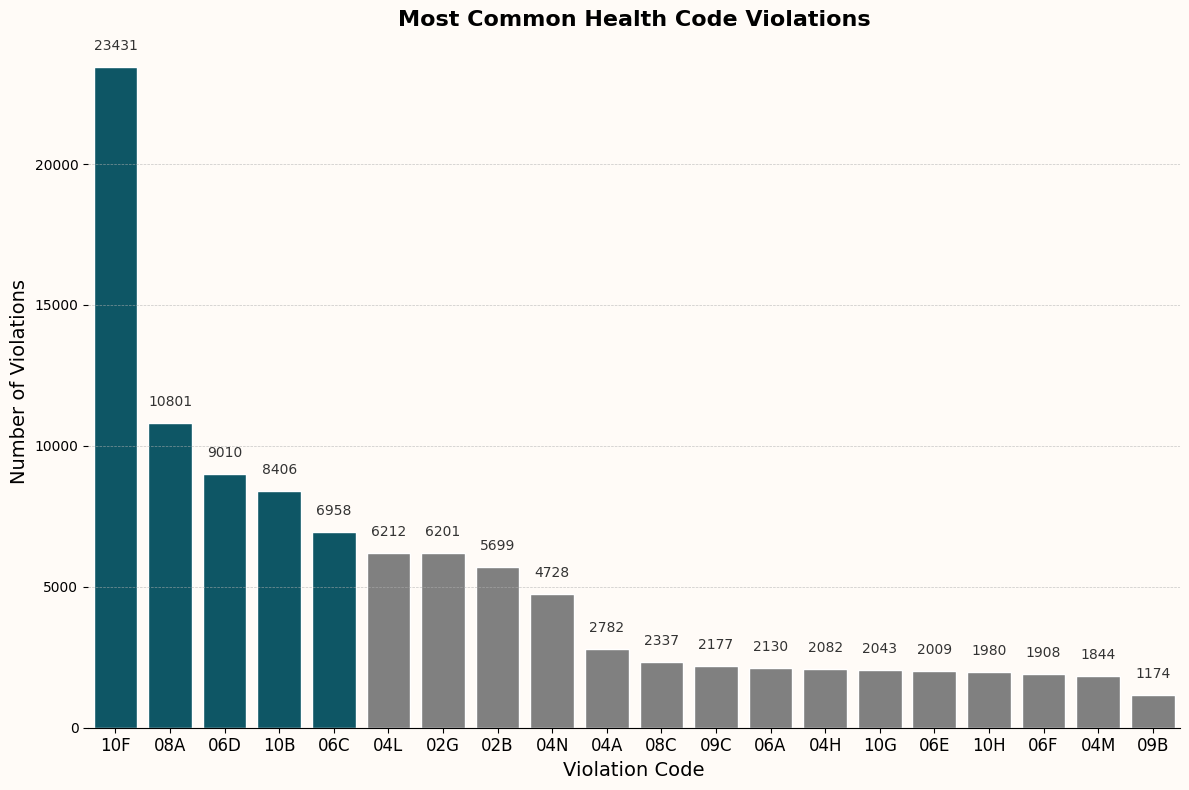

In [38]:
# Sort data and customize colors
violation_code_data = violation_code_data.sort_values(by='Count', ascending=False)
colors = ['#005F73' if i < 5 else 'grey' for i in range(len(violation_code_data))]  # Top 5 bars in #d32500, rest in grey

# Create the plot
plt.figure(figsize=(12, 8))

# Set a custom background color
plt.gcf().set_facecolor('#fffbf7')  # Set figure background color
ax = plt.gca()  # Get the current axis
ax.set_facecolor('#fffbf7')  # Set axis background color

# Set Seaborn style
sns.set_style("whitegrid", {"axes.facecolor": "#fffbf7"})  # Maintain grid but use the custom background

# Barplot with custom colors
sns.barplot(x='Violation Code', y='Count', data=violation_code_data, palette=colors)

# Add data labels
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 500, f'{int(height)}',
            ha='center', va='bottom', fontsize=10, color="#333333")

# Customize title and axis labels
plt.title('Most Common Health Code Violations', fontsize=16, fontweight='bold')
plt.xlabel('Violation Code', fontsize=14)
plt.ylabel('Number of Violations', fontsize=14)

# Add fewer y-axis tick values for simplicity
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(nbins=5))

# Add horizontal lines for better readability
plt.gca().yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Remove vertical lines (simplify spines)
for spine in ['top', 'right', 'left']:
    plt.gca().spines[spine].set_visible(False)

# Rotate x-axis labels if needed
plt.xticks(rotation=0, fontsize=12)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### The top 5 most common violation code are:

 1. 10F: Non-food contact surface improperly constructed or unacceptable material used.

 2. 06D: Food not protected from potential contamination during storage, preparation, transportation, display, or service.

 3. 08A: Evidence of mice or live mice present in the facility's food and/or non-food areas.

 4. 10B: Improper maintenance of a cold or hot holding unit, not maintaining required temperatures.

 5. 06C: Food not protected from potential contamination during storage, preparation, or transportation​.

## **2. Which neighborhoods or boroughs have the highest concentration of restaurants with 'A' grades?**

In [39]:
# Display basic statistics and explore the first few rows of the data
# Filter data for 'A' grades
a_grade_data = df[df['grade'] == 'A']

# Count 'A' grades by borough
borough_counts = a_grade_data['boro'].value_counts()

# Prepare the data for plotting
borough_data = borough_counts.reset_index()
borough_data.columns = ['Borough', 'Counts']
borough_data.head()

,Borough,Counts
0,Manhattan,32663
1,Brooklyn,22759
2,Queens,19318
3,Bronx,7340
4,Staten Island,3650


In [40]:
borough_data.dtypes

,0
Borough,object
Counts,int64


<ipython-input-41-6c57bf32a46f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Borough', y='Counts', data=borough_data, palette=colors)


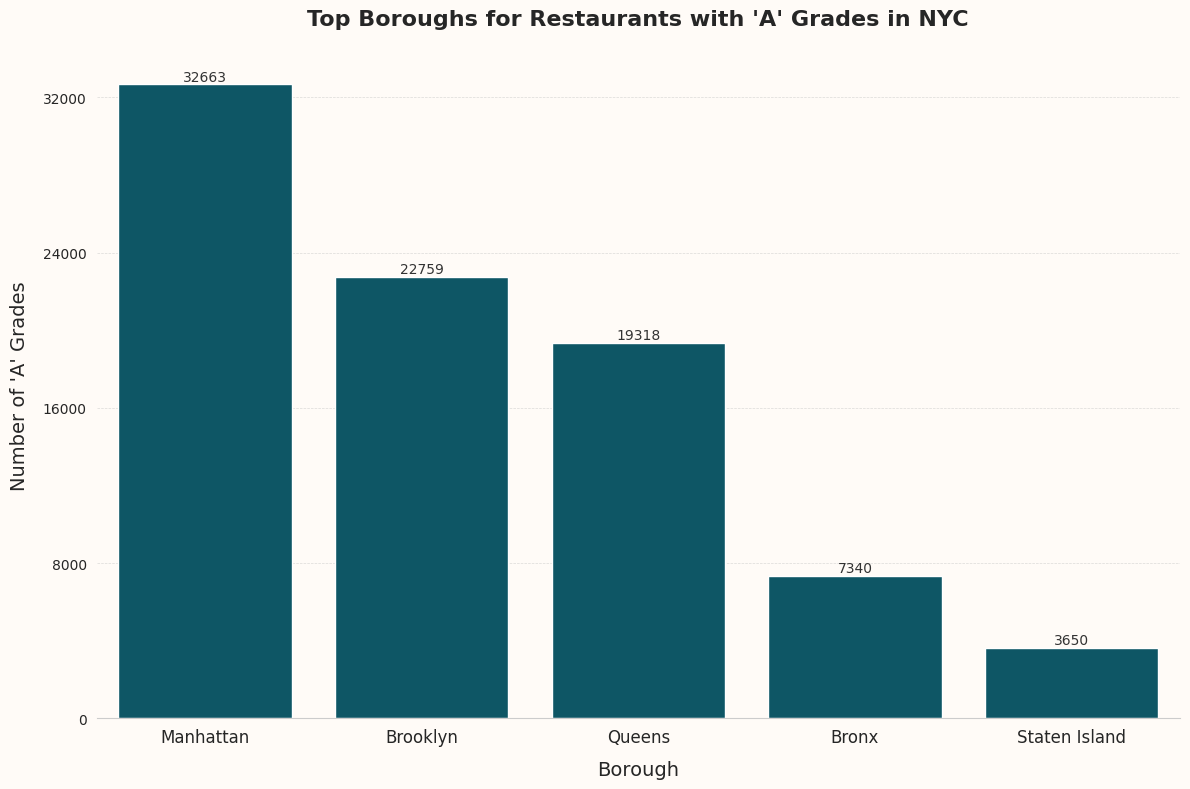

In [41]:
# Sort the data and customize colors
borough_data = borough_data.sort_values(by='Counts', ascending=False)
colors = ['#005F73' if i < 5 else 'grey' for i in range(len(borough_data))]  # Top 5 boroughs in #005F73, rest in grey

# Create the plot
plt.figure(figsize=(12, 8))

# Set custom background color
plt.gcf().set_facecolor('#fffbf7')  # Figure background color
ax = plt.gca()  # Current axis
ax.set_facecolor('#fffbf7')  # Axis background color

# Set Seaborn style
sns.set_style("whitegrid", {"axes.facecolor": "#fffbf7"})  # Maintain grid but use the custom background

# Barplot with custom colors
sns.barplot(x='Borough', y='Counts', data=borough_data, palette=colors)

# Add data labels
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 50, f'{int(height)}',
            ha='center', va='bottom', fontsize=10, color="#333333")

# Customize title and axis labels
plt.title("Top Boroughs for Restaurants with 'A' Grades in NYC", fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Borough', fontsize=14, labelpad=10)
plt.ylabel("Number of 'A' Grades", fontsize=14, labelpad=10)

# Add fewer y-axis tick values for simplicity
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(nbins=5))

# Add horizontal lines for better readability
plt.gca().yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Remove vertical lines (simplify spines)
for spine in ['top', 'right', 'left']:
    plt.gca().spines[spine].set_visible(False)

# Rotate x-axis labels if needed
plt.xticks(rotation=0, fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## 3. How do inspection grades (A, B, C) correlate with the type of cuisine served?

In [42]:
# Import necessary libraries for the analysis
import pandas as pd

# Convert unique values to a DataFrame
unique_cuisines_df = pd.DataFrame(df['cuisine description'].unique(), columns=['Cuisine Description'])

# Display the DataFrame
unique_cuisines_df


,Cuisine Description
0,Bangladeshi
1,Chinese
2,American
3,Japanese
4,Asian/Asian Fusion
...,...
84,Southwestern
85,Californian
86,Chimichurri
87,Basque


In [43]:
# Display basic statistics and explore the first few rows of the data
# Filter data for finalized grades (A, B, C)
final_grades = ['A', 'B', 'C']
filtered_data = df[df['grade'].isin(final_grades)]

# Count grades by cuisine type
grade_cuisine_counts = filtered_data.groupby(['cuisine description', 'grade']).size().reset_index(name='Count')

# Pivot the data for plotting
pivot_data = grade_cuisine_counts.pivot(index='cuisine description', columns='grade', values='Count').fillna(0)

# Sort by the total number of grades for each cuisine and select the top 10 cuisines
pivot_data['Total'] = pivot_data.sum(axis=1)
pivot_data = pivot_data.sort_values(by='Total', ascending=False).drop(columns='Total').head(20)

<ipython-input-43-f0d9fed091a0>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grade_cuisine_counts = filtered_data.groupby(['cuisine description', 'grade']).size().reset_index(name='Count')


In [44]:
pivot_data

grade,A,B,C,N,P,Z
cuisine description,,,,,,
American,16604,1935,1134,0,0,0
Chinese,6147,1845,1234,0,0,0
Coffee/Tea,7646,665,448,0,0,0
Pizza,5169,998,592,0,0,0
Bakery Products/Desserts,3397,678,347,0,0,0
Latin American,2859,836,469,0,0,0
Mexican,2899,757,502,0,0,0
Italian,3145,396,236,0,0,0
Caribbean,2386,630,509,0,0,0


<ipython-input-45-cc7c7c03ec5f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grade_cuisine_counts = filtered_data.groupby(['cuisine description', 'grade']).size().reset_index(name='Count')


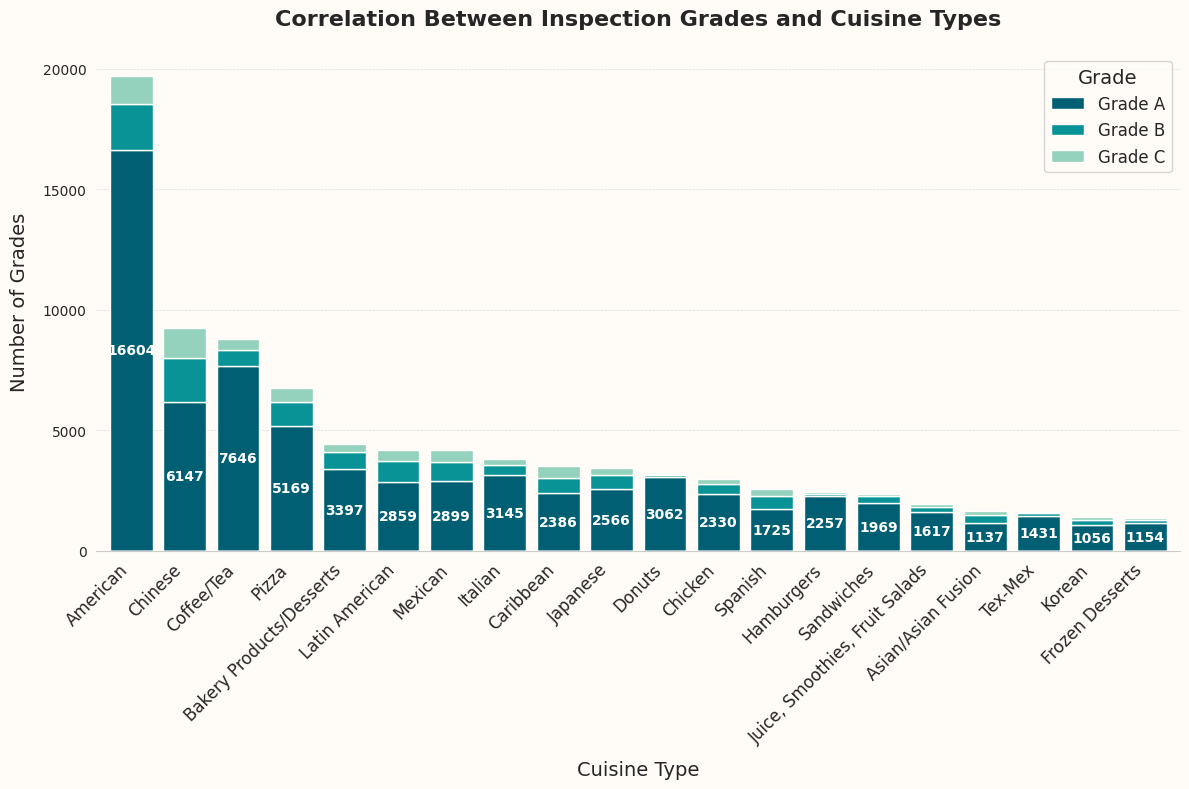

In [45]:
# Filter data for finalized grades (A, B, C)
final_grades = ['A', 'B', 'C']
filtered_data = df[df['grade'].isin(final_grades)]

# Count grades by cuisine type
grade_cuisine_counts = filtered_data.groupby(['cuisine description', 'grade']).size().reset_index(name='Count')

# Pivot the data for plotting
pivot_data = grade_cuisine_counts.pivot(index='cuisine description', columns='grade', values='Count').fillna(0)

# Sort by the total number of grades for each cuisine and select the top 20 cuisines
pivot_data['Total'] = pivot_data.sum(axis=1)
pivot_data = pivot_data.sort_values(by='Total', ascending=False).drop(columns='Total').head(20)

# Define colors for grades
colors = {'A': '#005F73', 'B': '#0A9396', 'C': '#94D2BD'}  # New color scheme

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Set a custom background color
fig.patch.set_facecolor('#fffbf7')  # Figure background color
ax.set_facecolor('#fffbf7')        # Axis background color

# Plot the stacked bar chart
pivot_data.plot(kind='bar', stacked=True, color=[colors['A'], colors['B'], colors['C']], width=0.8, ax=ax)

# Customize title and axis labels
ax.set_title("Correlation Between Inspection Grades and Cuisine Types", fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("Cuisine Type", fontsize=14, labelpad=10)
ax.set_ylabel("Number of Grades", fontsize=14, labelpad=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Add legend
ax.legend(labels=['Grade A', 'Grade B', 'Grade C'], title="Grade", fontsize=12, title_fontsize=14, loc='upper right')

# Add fewer y-axis tick values for simplicity
ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=5))

# Add horizontal gridlines and remove vertical lines
ax.yaxis.grid(True, color="#D3D3D3", linestyle="--", linewidth=0.5, alpha=0.7)
ax.xaxis.grid(False)

# Simplify spines (remove vertical lines)
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

# Annotate only Grade A counts on the bars
for i, cuisine in enumerate(pivot_data.index):
    value = pivot_data.loc[cuisine, 'A']
    if value > 0:
        ax.text(
            i,
            value / 2,  # Place in the middle of the Grade A segment
            str(int(value)),
            ha='center',
            va='center',
            fontsize=10,
            fontweight='bold',
            color='white'  # Contrast for readability
        )

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## **4. What trends are observed in health inspection results over time?**

<ipython-input-46-f029882812cf>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend_data = filtered_data.groupby(['year', 'grade']).size().reset_index(name='Count')


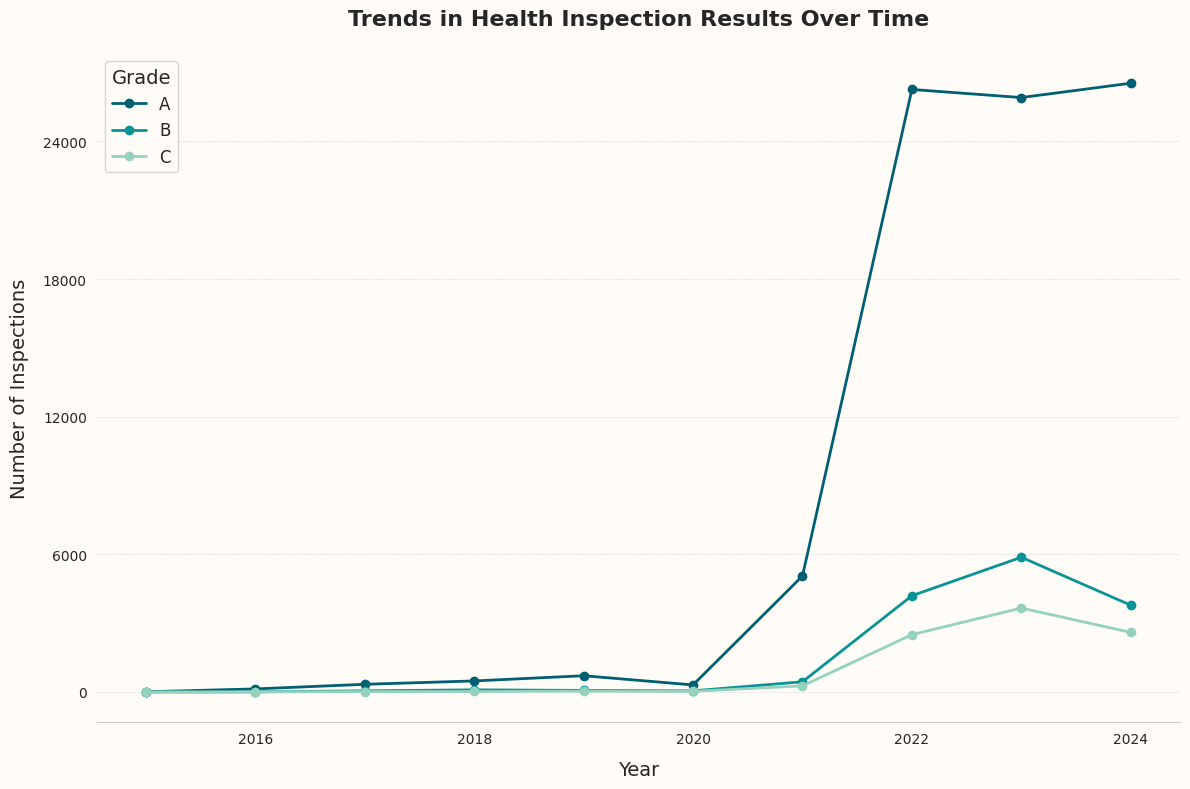

In [46]:
# Ensure the inspection_date is in datetime format
df['inspection date'] = pd.to_datetime(df['inspection date'])

# Filter data for finalized grades (A, B, C)
final_grades = ['A', 'B', 'C']
filtered_data = df.loc[df['grade'].isin(final_grades)].copy()

# Extract year from inspection_date
filtered_data['year'] = filtered_data['inspection date'].dt.year

# Group by year and grade
trend_data = filtered_data.groupby(['year', 'grade']).size().reset_index(name='Count')

# Pivot the data for plotting
trend_pivot = trend_data.pivot(index='year', columns='grade', values='Count').fillna(0)

# Ensure only final grades (A, B, C) are in the columns
trend_pivot = trend_pivot[['A', 'B', 'C']]

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Set a custom background color
fig.patch.set_facecolor('#fffbf7')  # Figure background color
ax.set_facecolor('#fffbf7')        # Axis background color

# Define the color scheme
colors = {'A': '#005F73', 'B': '#0A9396', 'C': '#94D2BD'}

# Plot the trend lines
trend_pivot.plot(kind='line', ax=ax, marker='o', linewidth=2, color=colors)

# Customize the plot
ax.set_title("Trends in Health Inspection Results Over Time", fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("Year", fontsize=14, labelpad=10)
ax.set_ylabel("Number of Inspections", fontsize=14, labelpad=10)
ax.legend(title="Grade", fontsize=12, title_fontsize=14, loc='upper left')

# Add horizontal gridlines and remove vertical lines
ax.yaxis.grid(True, color="#D3D3D3", linestyle="--", linewidth=0.5, alpha=0.7)
ax.xaxis.grid(False)

# Simplify spines (remove vertical lines)
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

# Add fewer y-axis tick values for simplicity
ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=5))

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [47]:
trend_pivot

grade,A,B,C
year,,,
2015,7,0,0
2016,132,3,4
2017,334,50,17
2018,480,91,20
2019,707,68,35
2020,306,48,28
2021,5054,444,265
2022,26263,4195,2498
2023,25911,5872,3657


----

# **Operational Efficiency**

## **5. What is the average time between inspections for restaurants, and how does it vary by grade or borough?**

Rows with `inspection_date` of NaN is converted to `0` becuase where were no previous inspection.

In [48]:
# Perform data cleaning steps to handle missing or inconsistent values
# Ensure the inspection_date is in datetime format
df['inspection date'] = pd.to_datetime(df['inspection date'])

# Sort the DataFrame by camis and inspection_date
df = df.sort_values(by=['camis', 'inspection date'])

# Calculate time between inspections for each restaurant
df['time_diff'] = df.groupby('camis')['inspection date'].diff().dt.days
df['time_diff'] = df['time_diff'].fillna(0)

# Subgroup using MultiIndex for a clean hierarchy
subgrouped_df = df.set_index(['camis', 'inspection date', 'grade'])[['time_diff']]
subgrouped_df_sorted = subgrouped_df.sort_values(by='time_diff', ascending=False)

# Display the sorted subgrouped DataFrame
subgrouped_df_sorted


time_diff
camis    inspection date grade           
50109094 2024-11-14      Z         1094.0
41271464 2022-08-25      A         1094.0
50072055 2023-03-03      A         1093.0
50094950 2023-02-16      C         1093.0
50075411 2023-03-08      A         1092.0
...                                   ...
50018035 2021-09-08      A            0.0
                         A            0.0
                         A            0.0
50018027 2024-02-07      A            0.0
50161316 2024-11-15      A            0.0

[114796 rows x 1 columns]

In [49]:
df.sort_values(by='time_diff', ascending=True)

,camis,dba,boro,building,street,zipcode,cuisine description,inspection date,action,violation code,...,critical flag,score,grade,grade date,record date,inspection type,latitude,longitude,location point1,time_diff
64627,30075445,Morris Park Bake Shop,Bronx,1007,MORRIS PARK AVENUE,10462.0,Bakery Products/Desserts,2023-02-03,Establishment re-opened by DOHMH.,02G,...,Critical,13.0,P,2023-02-03,2024-11-18,Cycle Inspection / Reopening Inspection,40.848231,-73.855972,NaN,0.0
105764,50092699,Cafe Borabora,Queens,9708,QUEENS BLVD,11374.0,Bagels/Pretzels,2024-01-24,Violations were cited in the following area(s).,10F,...,Not Critical,7.0,A,2024-01-24,2024-11-18,Cycle Inspection / Initial Inspection,40.729210,-73.859892,NaN,0.0
68045,50092699,Cafe Borabora,Queens,9708,QUEENS BLVD,11374.0,Bagels/Pretzels,2022-09-02,Violations were cited in the following area(s).,10F,...,Not Critical,6.0,A,2022-09-02,2024-11-18,Cycle Inspection / Re-inspection,40.729210,-73.859892,NaN,0.0
7083,50092699,Cafe Borabora,Queens,9708,QUEENS BLVD,11374.0,Bagels/Pretzels,2022-09-02,Violations were cited in the following area(s).,10C,...,Not Critical,6.0,A,2022-09-02,2024-11-18,Cycle Inspection / Re-inspection,40.729210,-73.859892,NaN,0.0
82334,50092698,Ollies To Go,Manhattan,307,EAST 77 STREET,10075.0,Chinese,2024-07-03,Violations were cited in the following area(s).,04M,...,Critical,11.0,A,2024-07-03,2024-11-18,Cycle Inspection / Initial Inspection,40.771831,-73.955553,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32003,50075411,Sushi Noz,Manhattan,181,EAST 78 STREET,10075.0,Japanese,2023-03-08,Violations were cited in the following area(s).,05D,...,Critical,12.0,A,2023-03-08,2024-11-18,Cycle Inspection / Initial Inspection,40.773846,-73.958364,NaN,1092.0
74963,50072055,Soogil,Manhattan,108,EAST 4 STREET,10003.0,Korean,2023-03-03,Violations were cited in the following area(s).,10F,...,Not Critical,2.0,A,2023-03-03,2024-11-18,Cycle Inspection / Initial Inspection,40.725658,-73.988206,NaN,1093.0
24163,50094950,Cream Ridgewood,Queens,5909,71ST AVE,11385.0,American,2023-02-16,Violations were cited in the following area(s).,02B,...,Critical,49.0,C,2023-02-16,2024-11-18,Cycle Inspection / Re-inspection,40.700599,-73.899440,NaN,1093.0
27670,50109094,Junction Seafood Restaurant,Queens,3464,JUNCTION BLVD,11372.0,Latin American,2024-11-14,Violations were cited in the following area(s).,03A,...,Critical,42.0,Z,2024-11-14,2024-11-18,Cycle Inspection / Re-inspection,40.753641,-73.871972,NaN,1094.0


In [50]:
# Perform data cleaning steps to handle missing or inconsistent values
# Calculate average time between inspections by grade
grade_avg_time = df.groupby('grade')['time_diff'].mean().reset_index()
grade_avg_time = grade_avg_time.dropna()  # Drop NaN values for better plotting
grade_avg_time

<ipython-input-50-d4e17fa6a415>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grade_avg_time = df.groupby('grade')['time_diff'].mean().reset_index()


,grade,time_diff
0,A,102.959886
1,B,46.943169
2,C,32.946168
3,N,30.500000
4,P,48.690226
5,Z,99.004032


In [51]:
# Perform data cleaning steps to handle missing or inconsistent values
# Calculate average time between inspections by grade
grade_avg_time = df.groupby('grade')['time_diff'].mean().reset_index()
grade_avg_time = grade_avg_time.dropna()  # Drop NaN values for better plotting
grade_avg_time

<ipython-input-51-d4e17fa6a415>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grade_avg_time = df.groupby('grade')['time_diff'].mean().reset_index()


,grade,time_diff
0,A,102.959886
1,B,46.943169
2,C,32.946168
3,N,30.500000
4,P,48.690226
5,Z,99.004032


In [52]:
df.sort_values(by='time_diff', ascending=True)

,camis,dba,boro,building,street,zipcode,cuisine description,inspection date,action,violation code,...,critical flag,score,grade,grade date,record date,inspection type,latitude,longitude,location point1,time_diff
64627,30075445,Morris Park Bake Shop,Bronx,1007,MORRIS PARK AVENUE,10462.0,Bakery Products/Desserts,2023-02-03,Establishment re-opened by DOHMH.,02G,...,Critical,13.0,P,2023-02-03,2024-11-18,Cycle Inspection / Reopening Inspection,40.848231,-73.855972,NaN,0.0
105764,50092699,Cafe Borabora,Queens,9708,QUEENS BLVD,11374.0,Bagels/Pretzels,2024-01-24,Violations were cited in the following area(s).,10F,...,Not Critical,7.0,A,2024-01-24,2024-11-18,Cycle Inspection / Initial Inspection,40.729210,-73.859892,NaN,0.0
68045,50092699,Cafe Borabora,Queens,9708,QUEENS BLVD,11374.0,Bagels/Pretzels,2022-09-02,Violations were cited in the following area(s).,10F,...,Not Critical,6.0,A,2022-09-02,2024-11-18,Cycle Inspection / Re-inspection,40.729210,-73.859892,NaN,0.0
7083,50092699,Cafe Borabora,Queens,9708,QUEENS BLVD,11374.0,Bagels/Pretzels,2022-09-02,Violations were cited in the following area(s).,10C,...,Not Critical,6.0,A,2022-09-02,2024-11-18,Cycle Inspection / Re-inspection,40.729210,-73.859892,NaN,0.0
82334,50092698,Ollies To Go,Manhattan,307,EAST 77 STREET,10075.0,Chinese,2024-07-03,Violations were cited in the following area(s).,04M,...,Critical,11.0,A,2024-07-03,2024-11-18,Cycle Inspection / Initial Inspection,40.771831,-73.955553,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32003,50075411,Sushi Noz,Manhattan,181,EAST 78 STREET,10075.0,Japanese,2023-03-08,Violations were cited in the following area(s).,05D,...,Critical,12.0,A,2023-03-08,2024-11-18,Cycle Inspection / Initial Inspection,40.773846,-73.958364,NaN,1092.0
74963,50072055,Soogil,Manhattan,108,EAST 4 STREET,10003.0,Korean,2023-03-03,Violations were cited in the following area(s).,10F,...,Not Critical,2.0,A,2023-03-03,2024-11-18,Cycle Inspection / Initial Inspection,40.725658,-73.988206,NaN,1093.0
24163,50094950,Cream Ridgewood,Queens,5909,71ST AVE,11385.0,American,2023-02-16,Violations were cited in the following area(s).,02B,...,Critical,49.0,C,2023-02-16,2024-11-18,Cycle Inspection / Re-inspection,40.700599,-73.899440,NaN,1093.0
27670,50109094,Junction Seafood Restaurant,Queens,3464,JUNCTION BLVD,11372.0,Latin American,2024-11-14,Violations were cited in the following area(s).,03A,...,Critical,42.0,Z,2024-11-14,2024-11-18,Cycle Inspection / Re-inspection,40.753641,-73.871972,NaN,1094.0


In [53]:
# Compute the overall average time between inspections
overall_avg_time = df['time_diff'].mean()
print(f"Overall Average Time Between Inspections: {overall_avg_time:.2f} days")


Overall Average Time Between Inspections: 89.81 days


In [54]:
# Calculate the average time difference for each restaurant
average_time_per_restaurant = df.groupby('camis')['time_diff'].mean().reset_index()
average_time_per_restaurant.columns = ['camis', 'average_time_diff']
average_time_per_restaurant.sort_values(by='average_time_diff', ascending=False)

,camis,average_time_diff
9049,50044929,539.5
9045,50044902,525.5
9598,50050873,525.0
10092,50056945,511.5
7755,50015854,507.0
...,...,...
14868,50100294,0.0
14874,50100322,0.0
14882,50100370,0.0
14883,50100371,0.0


In [55]:
specific_row = df[df['camis'] == 40365904]
specific_row

,camis,dba,boro,building,street,zipcode,cuisine description,inspection date,action,violation code,...,critical flag,score,grade,grade date,record date,inspection type,latitude,longitude,location point1,time_diff
2971,40365904,Mee Sum Cafe,Manhattan,26,PELL STREET,10013.0,Coffee/Tea,2021-11-24,Violations were cited in the following area(s).,02G,...,Critical,24.0,B,2021-11-24,2024-11-18,Cycle Inspection / Re-inspection,40.714861,-73.9982,NaN,0.0
60025,40365904,Mee Sum Cafe,Manhattan,26,PELL STREET,10013.0,Coffee/Tea,2021-11-24,Violations were cited in the following area(s).,10F,...,Not Critical,24.0,B,2021-11-24,2024-11-18,Cycle Inspection / Re-inspection,40.714861,-73.9982,NaN,0.0
92614,40365904,Mee Sum Cafe,Manhattan,26,PELL STREET,10013.0,Coffee/Tea,2021-11-24,Violations were cited in the following area(s).,06C,...,Critical,24.0,B,2021-11-24,2024-11-18,Cycle Inspection / Re-inspection,40.714861,-73.9982,NaN,0.0
94033,40365904,Mee Sum Cafe,Manhattan,26,PELL STREET,10013.0,Coffee/Tea,2021-11-24,Violations were cited in the following area(s).,10B,...,Not Critical,24.0,B,2021-11-24,2024-11-18,Cycle Inspection / Re-inspection,40.714861,-73.9982,NaN,0.0
105676,40365904,Mee Sum Cafe,Manhattan,26,PELL STREET,10013.0,Coffee/Tea,2021-11-24,Violations were cited in the following area(s).,02B,...,Critical,24.0,B,2021-11-24,2024-11-18,Cycle Inspection / Re-inspection,40.714861,-73.9982,NaN,0.0
79,40365904,Mee Sum Cafe,Manhattan,26,PELL STREET,10013.0,Coffee/Tea,2022-09-30,Violations were cited in the following area(s).,02I,...,Critical,59.0,C,2022-09-30,2024-11-18,Cycle Inspection / Re-inspection,40.714861,-73.9982,NaN,310.0
10265,40365904,Mee Sum Cafe,Manhattan,26,PELL STREET,10013.0,Coffee/Tea,2022-09-30,Violations were cited in the following area(s).,04A,...,Critical,59.0,C,2022-09-30,2024-11-18,Cycle Inspection / Re-inspection,40.714861,-73.9982,NaN,0.0
33738,40365904,Mee Sum Cafe,Manhattan,26,PELL STREET,10013.0,Coffee/Tea,2022-09-30,Violations were cited in the following area(s).,06C,...,Critical,59.0,C,2022-09-30,2024-11-18,Cycle Inspection / Re-inspection,40.714861,-73.9982,NaN,0.0
46735,40365904,Mee Sum Cafe,Manhattan,26,PELL STREET,10013.0,Coffee/Tea,2022-09-30,Violations were cited in the following area(s).,02B,...,Critical,59.0,C,2022-09-30,2024-11-18,Cycle Inspection / Re-inspection,40.714861,-73.9982,NaN,0.0
52034,40365904,Mee Sum Cafe,Manhattan,26,PELL STREET,10013.0,Coffee/Tea,2022-09-30,Violations were cited in the following area(s).,06F,...,Critical,59.0,C,2022-09-30,2024-11-18,Cycle Inspection / Re-inspection,40.714861,-73.9982,NaN,0.0


This graph is skew. Need to compare within 2 years as well.

In [56]:
# Import necessary libraries for the analysis
import pandas as pd

# Ensure inspection_date is in datetime format
df['inspection date'] = pd.to_datetime(df['inspection date'])

# Calculate time_diff for each inspection
df['time_diff'] = df.groupby('camis')['inspection date'].diff().dt.days
df['time_diff'] = df['time_diff'].fillna(0)  # Replace NaN with 0 for the first inspection

# Calculate cumulative time_diff for each restaurant
df['cumulative_days'] = df.groupby('camis')['time_diff'].cumsum()

# Convert cumulative days to operational years
df['operational_years'] = df['cumulative_days'] / 365

# Display the updated DataFrame
df[['camis', 'inspection date', 'time_diff', 'cumulative_days', 'operational_years']]


,camis,inspection date,time_diff,cumulative_days,operational_years
64627,30075445,2023-02-03,0.0,0.0,0.000000
105357,30075445,2023-02-03,0.0,0.0,0.000000
77684,30075445,2023-08-22,200.0,200.0,0.547945
105328,30075445,2023-08-22,0.0,200.0,0.547945
107941,30075445,2023-08-22,0.0,200.0,0.547945
...,...,...,...,...,...
75095,50160415,2024-11-13,0.0,0.0,0.000000
12927,50161189,2024-11-12,0.0,0.0,0.000000
18766,50161189,2024-11-12,0.0,0.0,0.000000
112951,50161189,2024-11-12,0.0,0.0,0.000000


In [57]:
specific_row = df[df['camis'] == 30075445]
specific_row

,camis,dba,boro,building,street,zipcode,cuisine description,inspection date,action,violation code,...,grade,grade date,record date,inspection type,latitude,longitude,location point1,time_diff,cumulative_days,operational_years
64627,30075445,Morris Park Bake Shop,Bronx,1007,MORRIS PARK AVENUE,10462.0,Bakery Products/Desserts,2023-02-03,Establishment re-opened by DOHMH.,02G,...,P,2023-02-03,2024-11-18,Cycle Inspection / Reopening Inspection,40.848231,-73.855972,NaN,0.0,0.0,0.000000
105357,30075445,Morris Park Bake Shop,Bronx,1007,MORRIS PARK AVENUE,10462.0,Bakery Products/Desserts,2023-02-03,Establishment re-opened by DOHMH.,10F,...,P,2023-02-03,2024-11-18,Cycle Inspection / Reopening Inspection,40.848231,-73.855972,NaN,0.0,0.0,0.000000
77684,30075445,Morris Park Bake Shop,Bronx,1007,MORRIS PARK AVENUE,10462.0,Bakery Products/Desserts,2023-08-22,Violations were cited in the following area(s).,08C,...,A,2023-08-22,2024-11-18,Cycle Inspection / Re-inspection,40.848231,-73.855972,NaN,200.0,200.0,0.547945
105328,30075445,Morris Park Bake Shop,Bronx,1007,MORRIS PARK AVENUE,10462.0,Bakery Products/Desserts,2023-08-22,Violations were cited in the following area(s).,08A,...,A,2023-08-22,2024-11-18,Cycle Inspection / Re-inspection,40.848231,-73.855972,NaN,0.0,200.0,0.547945
107941,30075445,Morris Park Bake Shop,Bronx,1007,MORRIS PARK AVENUE,10462.0,Bakery Products/Desserts,2023-08-22,Violations were cited in the following area(s).,04L,...,A,2023-08-22,2024-11-18,Cycle Inspection / Re-inspection,40.848231,-73.855972,NaN,0.0,200.0,0.547945
3422,30075445,Morris Park Bake Shop,Bronx,1007,MORRIS PARK AVENUE,10462.0,Bakery Products/Desserts,2024-11-08,Violations were cited in the following area(s).,08C,...,A,2024-11-08,2024-11-18,Cycle Inspection / Initial Inspection,40.848231,-73.855972,NaN,444.0,644.0,1.764384
35780,30075445,Morris Park Bake Shop,Bronx,1007,MORRIS PARK AVENUE,10462.0,Bakery Products/Desserts,2024-11-08,Violations were cited in the following area(s).,06C,...,A,2024-11-08,2024-11-18,Cycle Inspection / Initial Inspection,40.848231,-73.855972,NaN,0.0,644.0,1.764384
110141,30075445,Morris Park Bake Shop,Bronx,1007,MORRIS PARK AVENUE,10462.0,Bakery Products/Desserts,2024-11-08,Violations were cited in the following area(s).,10F,...,A,2024-11-08,2024-11-18,Cycle Inspection / Initial Inspection,40.848231,-73.855972,NaN,0.0,644.0,1.764384


In [58]:
def categorize_duration(years):
    if years <= 1:
        return 'Short-lived (≤ 1 year)'
    elif years <= 5:
        return 'Medium-lived (1-5 years)'
    else:
        return 'Long-lived (> 5 years)'

df['duration_category'] = df['operational_years'].apply(categorize_duration)


In [59]:
df

,camis,dba,boro,building,street,zipcode,cuisine description,inspection date,action,violation code,...,grade date,record date,inspection type,latitude,longitude,location point1,time_diff,cumulative_days,operational_years,duration_category
64627,30075445,Morris Park Bake Shop,Bronx,1007,MORRIS PARK AVENUE,10462.0,Bakery Products/Desserts,2023-02-03,Establishment re-opened by DOHMH.,02G,...,2023-02-03,2024-11-18,Cycle Inspection / Reopening Inspection,40.848231,-73.855972,NaN,0.0,0.0,0.000000,Short-lived (≤ 1 year)
105357,30075445,Morris Park Bake Shop,Bronx,1007,MORRIS PARK AVENUE,10462.0,Bakery Products/Desserts,2023-02-03,Establishment re-opened by DOHMH.,10F,...,2023-02-03,2024-11-18,Cycle Inspection / Reopening Inspection,40.848231,-73.855972,NaN,0.0,0.0,0.000000,Short-lived (≤ 1 year)
77684,30075445,Morris Park Bake Shop,Bronx,1007,MORRIS PARK AVENUE,10462.0,Bakery Products/Desserts,2023-08-22,Violations were cited in the following area(s).,08C,...,2023-08-22,2024-11-18,Cycle Inspection / Re-inspection,40.848231,-73.855972,NaN,200.0,200.0,0.547945,Short-lived (≤ 1 year)
105328,30075445,Morris Park Bake Shop,Bronx,1007,MORRIS PARK AVENUE,10462.0,Bakery Products/Desserts,2023-08-22,Violations were cited in the following area(s).,08A,...,2023-08-22,2024-11-18,Cycle Inspection / Re-inspection,40.848231,-73.855972,NaN,0.0,200.0,0.547945,Short-lived (≤ 1 year)
107941,30075445,Morris Park Bake Shop,Bronx,1007,MORRIS PARK AVENUE,10462.0,Bakery Products/Desserts,2023-08-22,Violations were cited in the following area(s).,04L,...,2023-08-22,2024-11-18,Cycle Inspection / Re-inspection,40.848231,-73.855972,NaN,0.0,200.0,0.547945,Short-lived (≤ 1 year)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75095,50160415,Bar V,Manhattan,10,MORTON STREET,10014.0,Mediterranean,2024-11-13,Violations were cited in the following area(s).,06C,...,2024-11-13,2024-11-18,Pre-permit (Operational) / Initial Inspection,40.731326,-74.003532,NaN,0.0,0.0,0.000000,Short-lived (≤ 1 year)
12927,50161189,Nara Chicken Korean Cuisine,Brooklyn,137,HAVEMEYER STREET,11211.0,Korean,2024-11-12,Violations were cited in the following area(s).,10F,...,2024-11-12,2024-11-18,Pre-permit (Operational) / Initial Inspection,40.712034,-73.957248,NaN,0.0,0.0,0.000000,Short-lived (≤ 1 year)
18766,50161189,Nara Chicken Korean Cuisine,Brooklyn,137,HAVEMEYER STREET,11211.0,Korean,2024-11-12,Violations were cited in the following area(s).,04N,...,2024-11-12,2024-11-18,Pre-permit (Operational) / Initial Inspection,40.712034,-73.957248,NaN,0.0,0.0,0.000000,Short-lived (≤ 1 year)
112951,50161189,Nara Chicken Korean Cuisine,Brooklyn,137,HAVEMEYER STREET,11211.0,Korean,2024-11-12,Violations were cited in the following area(s).,06C,...,2024-11-12,2024-11-18,Pre-permit (Operational) / Initial Inspection,40.712034,-73.957248,NaN,0.0,0.0,0.000000,Short-lived (≤ 1 year)


In [60]:
df['operational_years'].sort_values()

,operational_years
64627,0.0
23394,0.0
41156,0.0
36580,0.0
104568,0.0
...,...
65343,3.0
8937,3.0
87475,3.0
80090,3.0


In [61]:
# Display basic statistics and explore the first few rows of the data
print(df['operational_years'].describe())
print(df['operational_years'].value_counts(bins=[0, 1, 5, float('inf')]))


count    114796.000000
mean          0.755878
std           0.906314
min           0.000000
25%           0.000000
50%           0.000000
75%           1.473973
max           3.000000
Name: operational_years, dtype: float64
(-0.001, 1.0]    68137
(1.0, 5.0]       46659
(5.0, inf]           0
Name: count, dtype: int64


Compare only restuarants that starts from the baseline, for example 2 years.

In [62]:
df_inspections = df.groupby('camis').agg(
    total_inspections=('inspection date', 'count'),
    average_time_diff=('time_diff', 'mean')
).reset_index()
df_inspections.sort_values(by='total_inspections', ascending=False)


,camis,total_inspections,average_time_diff
61,40365904,31,27.709677
13607,50089474,31,18.322581
17028,50111191,25,43.000000
4837,41561516,24,43.083333
17050,50111296,23,24.478261
...,...,...,...
12391,50079359,1,0.000000
22279,50139546,1,0.000000
22275,50139514,1,0.000000
12428,50079672,1,0.000000


In [63]:
# Perform data cleaning steps to handle missing or inconsistent values
# Reset the index of the DataFrame
df = df.reset_index(drop=True)

# Display the DataFrame after resetting the index
df


,camis,dba,boro,building,street,zipcode,cuisine description,inspection date,action,violation code,...,grade date,record date,inspection type,latitude,longitude,location point1,time_diff,cumulative_days,operational_years,duration_category
0,30075445,Morris Park Bake Shop,Bronx,1007,MORRIS PARK AVENUE,10462.0,Bakery Products/Desserts,2023-02-03,Establishment re-opened by DOHMH.,02G,...,2023-02-03,2024-11-18,Cycle Inspection / Reopening Inspection,40.848231,-73.855972,NaN,0.0,0.0,0.000000,Short-lived (≤ 1 year)
1,30075445,Morris Park Bake Shop,Bronx,1007,MORRIS PARK AVENUE,10462.0,Bakery Products/Desserts,2023-02-03,Establishment re-opened by DOHMH.,10F,...,2023-02-03,2024-11-18,Cycle Inspection / Reopening Inspection,40.848231,-73.855972,NaN,0.0,0.0,0.000000,Short-lived (≤ 1 year)
2,30075445,Morris Park Bake Shop,Bronx,1007,MORRIS PARK AVENUE,10462.0,Bakery Products/Desserts,2023-08-22,Violations were cited in the following area(s).,08C,...,2023-08-22,2024-11-18,Cycle Inspection / Re-inspection,40.848231,-73.855972,NaN,200.0,200.0,0.547945,Short-lived (≤ 1 year)
3,30075445,Morris Park Bake Shop,Bronx,1007,MORRIS PARK AVENUE,10462.0,Bakery Products/Desserts,2023-08-22,Violations were cited in the following area(s).,08A,...,2023-08-22,2024-11-18,Cycle Inspection / Re-inspection,40.848231,-73.855972,NaN,0.0,200.0,0.547945,Short-lived (≤ 1 year)
4,30075445,Morris Park Bake Shop,Bronx,1007,MORRIS PARK AVENUE,10462.0,Bakery Products/Desserts,2023-08-22,Violations were cited in the following area(s).,04L,...,2023-08-22,2024-11-18,Cycle Inspection / Re-inspection,40.848231,-73.855972,NaN,0.0,200.0,0.547945,Short-lived (≤ 1 year)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114791,50160415,Bar V,Manhattan,10,MORTON STREET,10014.0,Mediterranean,2024-11-13,Violations were cited in the following area(s).,06C,...,2024-11-13,2024-11-18,Pre-permit (Operational) / Initial Inspection,40.731326,-74.003532,NaN,0.0,0.0,0.000000,Short-lived (≤ 1 year)
114792,50161189,Nara Chicken Korean Cuisine,Brooklyn,137,HAVEMEYER STREET,11211.0,Korean,2024-11-12,Violations were cited in the following area(s).,10F,...,2024-11-12,2024-11-18,Pre-permit (Operational) / Initial Inspection,40.712034,-73.957248,NaN,0.0,0.0,0.000000,Short-lived (≤ 1 year)
114793,50161189,Nara Chicken Korean Cuisine,Brooklyn,137,HAVEMEYER STREET,11211.0,Korean,2024-11-12,Violations were cited in the following area(s).,04N,...,2024-11-12,2024-11-18,Pre-permit (Operational) / Initial Inspection,40.712034,-73.957248,NaN,0.0,0.0,0.000000,Short-lived (≤ 1 year)
114794,50161189,Nara Chicken Korean Cuisine,Brooklyn,137,HAVEMEYER STREET,11211.0,Korean,2024-11-12,Violations were cited in the following area(s).,06C,...,2024-11-12,2024-11-18,Pre-permit (Operational) / Initial Inspection,40.712034,-73.957248,NaN,0.0,0.0,0.000000,Short-lived (≤ 1 year)


In [64]:
# Subgroup using MultiIndex for a clean hierarchy
subgrouped_df = df.set_index(['camis', 'inspection date', 'grade'])[['time_diff']]
subgrouped_df

time_diff
camis    inspection date grade           
30075445 2023-02-03      P            0.0
                         P            0.0
         2023-08-22      A          200.0
                         A            0.0
                         A            0.0
...                                   ...
50160415 2024-11-13      A            0.0
50161189 2024-11-12      A            0.0
                         A            0.0
                         A            0.0
50161316 2024-11-15      A            0.0

[114796 rows x 1 columns]

In [65]:
# Calculate the average time difference for each restaurant
average_time_per_restaurant = df.groupby('camis')['time_diff'].mean().reset_index()
average_time_per_restaurant.columns = ['camis', 'average_time_diff']
average_time_per_restaurant

,camis,average_time_diff
0,30075445,80.50
1,30191841,94.80
2,40356018,0.00
3,40356483,102.50
4,40356731,120.25
...,...,...
24233,50160241,0.00
24234,50160260,0.00
24235,50160415,0.00
24236,50161189,0.00


In [66]:
# Perform data cleaning steps to handle missing or inconsistent values
# Step 1: Ensure the main DataFrame is loaded
filtered_df = df.dropna(subset=['grade', 'boro', 'time_diff'])

# Step 2: Calculate average time differences by grade and borough
average_by_grade = filtered_df.groupby('grade')['time_diff'].mean().reset_index()
average_by_boro = filtered_df.groupby('boro')['time_diff'].mean().reset_index()

# Step 3: Display or print the results
print("Average Time Difference by Grade:")
print(average_by_grade)

print("\nAverage Time Difference by Borough:")
print(average_by_boro)


Average Time Difference by Grade:
  grade   time_diff
0     A  102.959886
1     B   46.943169
2     C   32.946168
3     N   30.500000
4     P   48.690226
5     Z   99.004032

Average Time Difference by Borough:
            boro  time_diff
0          Bronx  88.136920
1       Brooklyn  92.308914
2      Manhattan  91.187896
3         Queens  85.409267
4  Staten Island  89.898959


<ipython-input-66-0939ba793745>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_by_grade = filtered_df.groupby('grade')['time_diff'].mean().reset_index()


In [67]:
# Step 4: Calculate average time differences by grade and borough
average_by_grade = filtered_df.groupby('grade')['time_diff'].mean().reset_index()
average_by_boro = filtered_df.groupby('boro')['time_diff'].mean().reset_index()

<ipython-input-67-18b3dbb5c161>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_by_grade = filtered_df.groupby('grade')['time_diff'].mean().reset_index()


<ipython-input-68-2ff9066de617>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_by_grade = filtered_df.groupby('grade')['time_diff'].mean().reset_index()
<ipython-input-68-2ff9066de617>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_by_grade, x='grade', y='time_diff', palette={'A': '#005F73', 'B': '#0A9396', 'C': '#94D2BD'})


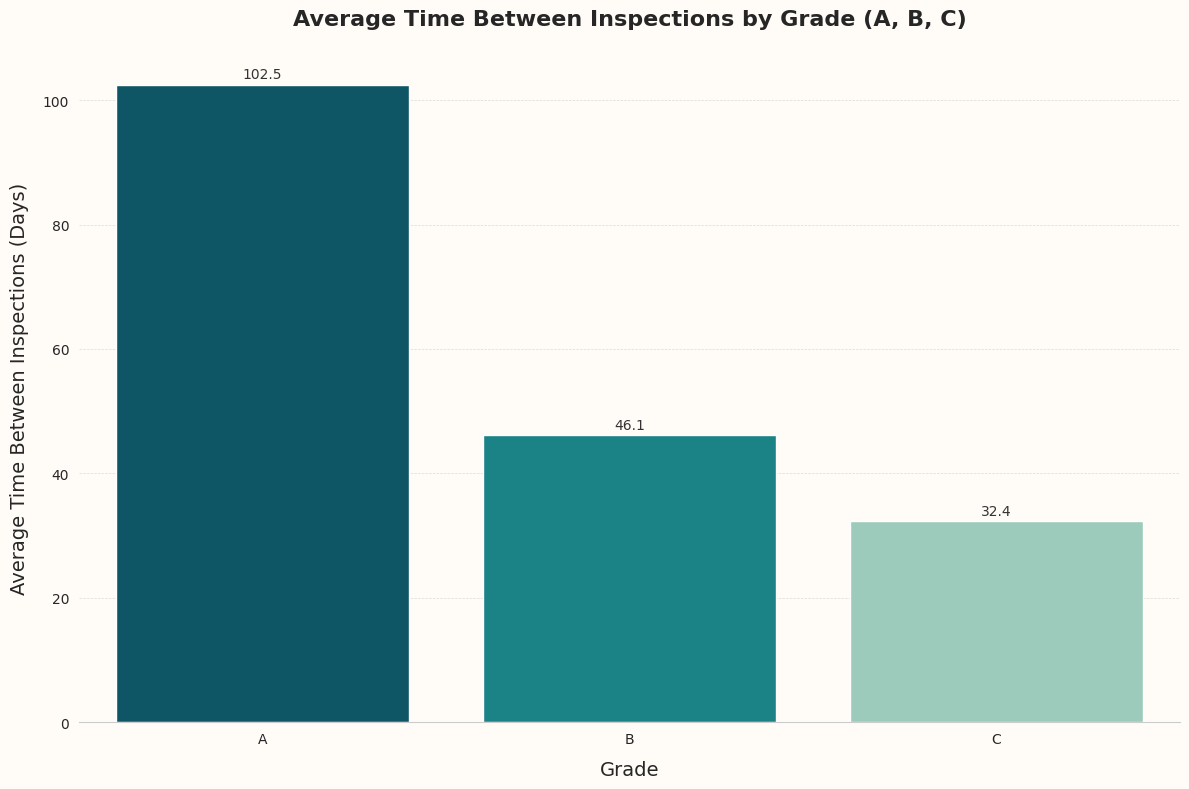

<ipython-input-68-2ff9066de617>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_by_boro, x='boro', y='time_diff', palette=boro_colors)


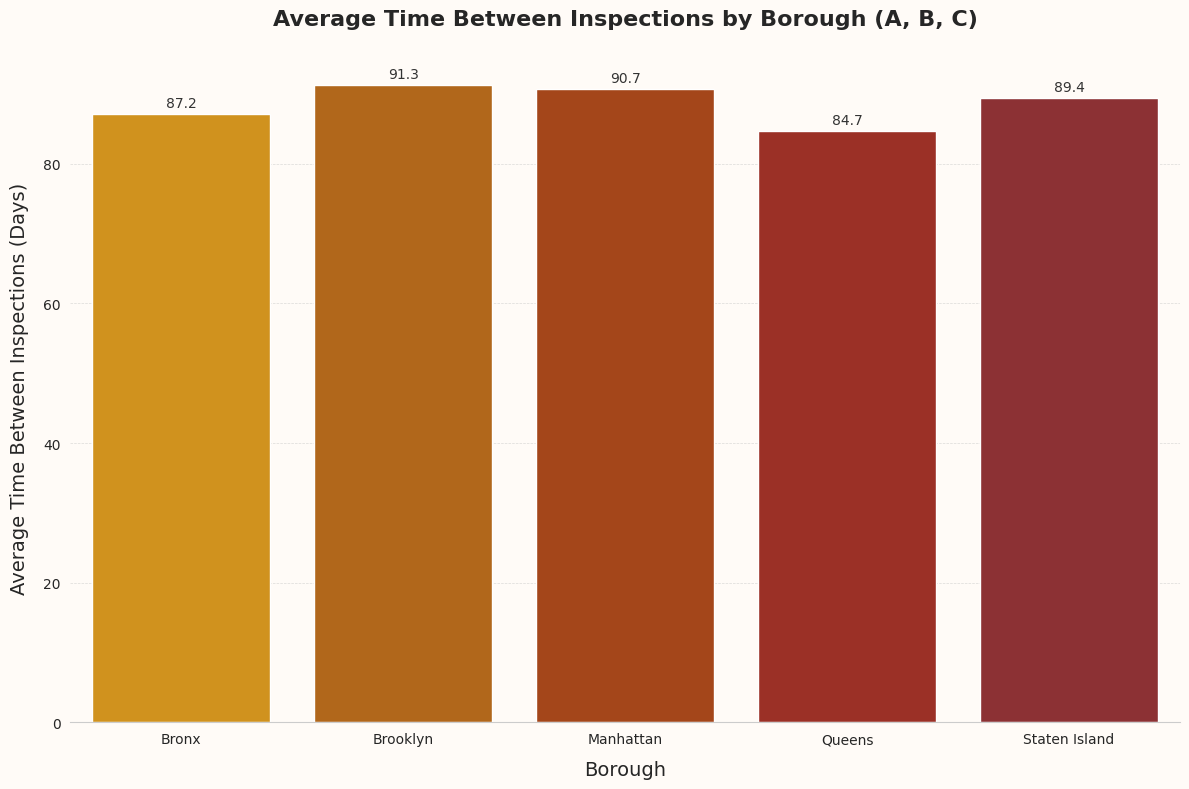

In [68]:
# Step 1: Filter the DataFrame to include only grades A, B, and C
filtered_df = df[df['grade'].isin(['A', 'B', 'C'])].copy()

# Step 2: Reset the grade column categories (if it's a categorical column)
if filtered_df['grade'].dtype.name == 'category':
    filtered_df['grade'] = filtered_df['grade'].cat.remove_unused_categories()

# Step 3: Calculate time differences between inspections
filtered_df['time_diff'] = filtered_df.groupby('camis')['inspection date'].diff().dt.days
filtered_df['time_diff'] = filtered_df['time_diff'].fillna(0)  # Fill NaN for first inspection

# Step 4: Calculate average time differences by grade
average_by_grade = filtered_df.groupby('grade')['time_diff'].mean().reset_index()

# Step 5: Visualize Average Time by Grade
plt.figure(figsize=(12, 8))

# Set custom background color
plt.gcf().set_facecolor('#fffbf7')
ax = plt.gca()
ax.set_facecolor('#fffbf7')

# Barplot for grades
sns.barplot(data=average_by_grade, x='grade', y='time_diff', palette={'A': '#005F73', 'B': '#0A9396', 'C': '#94D2BD'})

# Add data labels
for i, row in average_by_grade.iterrows():
    plt.text(i, row['time_diff'] + 1, f"{row['time_diff']:.1f}", ha='center', fontsize=10, color="#333333")

# Customize plot
plt.title("Average Time Between Inspections by Grade (A, B, C)", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Grade", fontsize=14, labelpad=10)
plt.ylabel("Average Time Between Inspections (Days)", fontsize=14, labelpad=10)

# Add horizontal gridlines
plt.gca().yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Simplify spines
for spine in ['top', 'right', 'left']:
    plt.gca().spines[spine].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

# Step 6: Calculate average time differences by borough
average_by_boro = filtered_df.groupby('boro')['time_diff'].mean().reset_index()

# Step 7: Visualize Average Time by Borough
plt.figure(figsize=(12, 8))

# Set custom background color
plt.gcf().set_facecolor('#fffbf7')
ax = plt.gca()
ax.set_facecolor('#fffbf7')

# Barplot for boroughs
boro_colors = ['#EE9B00', '#CA6702', '#BB3E03', '#AE2012', '#9B2226']
sns.barplot(data=average_by_boro, x='boro', y='time_diff', palette=boro_colors)

# Add data labels
for i, row in average_by_boro.iterrows():
    plt.text(i, row['time_diff'] + 1, f"{row['time_diff']:.1f}", ha='center', fontsize=10, color="#333333")

# Customize plot
plt.title("Average Time Between Inspections by Borough (A, B, C)", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Borough", fontsize=14, labelpad=10)
plt.ylabel("Average Time Between Inspections (Days)", fontsize=14, labelpad=10)

# Add horizontal gridlines
plt.gca().yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Simplify spines
for spine in ['top', 'right', 'left']:
    plt.gca().spines[spine].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()


In [69]:
average_by_grade

,grade,time_diff
0,A,102.474035
1,B,46.111943
2,C,32.363666


In [70]:
average_by_boro

,boro,time_diff
0,Bronx,87.171660
1,Brooklyn,91.344783
2,Manhattan,90.743332
3,Queens,84.715425
4,Staten Island,89.397232


## **6. Which restaurant chains have consistently received high health grades?**

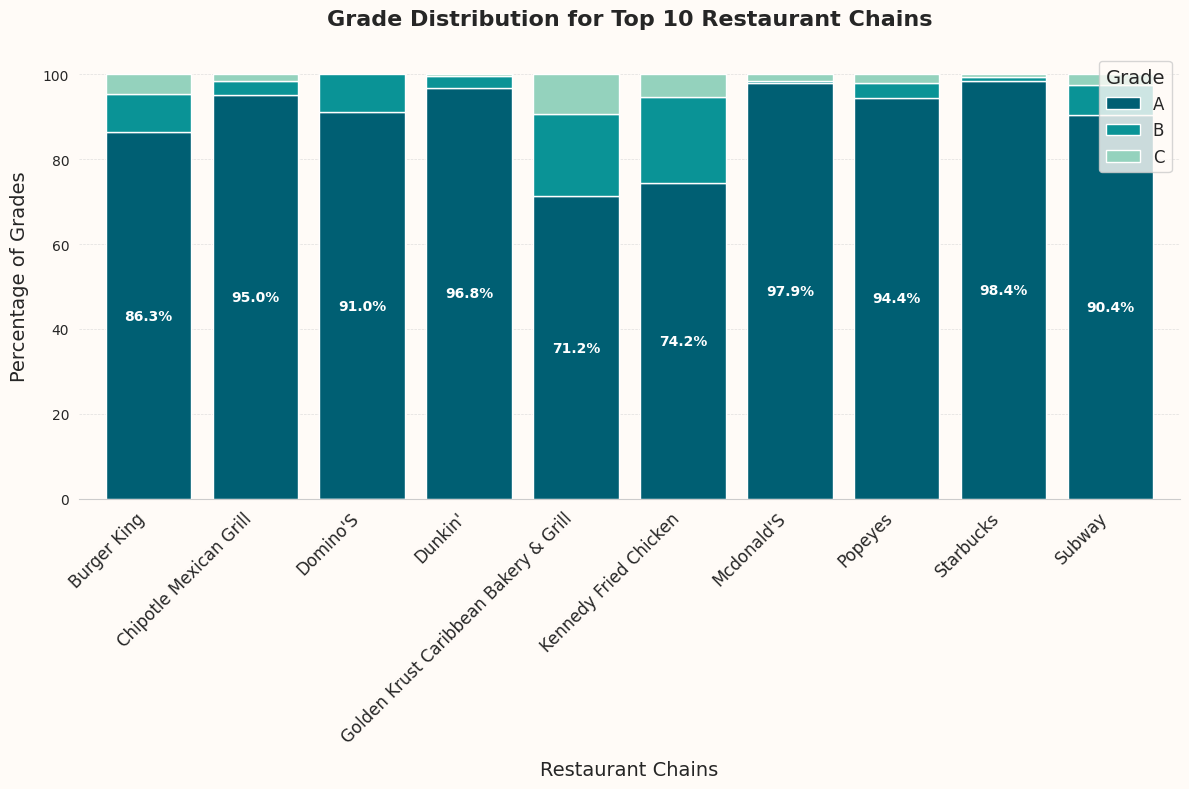

In [71]:
# Step 1: Standardize 'Dunkin' and 'Dunkin'' to 'Dunkin'
df['dba'] = df['dba'].replace({"Dunkin": "Dunkin'"})

# Step 2: Filter the dataset to include relevant chains and grades
top_chains = df['dba'].value_counts().head(10).index  # Top 10 chains by inspection count
filtered_df = df[df['dba'].isin(top_chains) & df['grade'].isin(['A', 'B', 'C'])]

# Step 3: Create a pivot table for grades
grade_distribution = pd.crosstab(filtered_df['dba'], filtered_df['grade'], normalize='index') * 100

# Step 4: Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Set a custom background color
fig.patch.set_facecolor('#fffbf7')  # Figure background color
ax.set_facecolor('#fffbf7')        # Axis background color

# Define the custom color palette for grades
colors = ['#005F73', '#0A9396', '#94D2BD']  # Custom colors for A, B, C

# Plot the stacked bar chart without black borders
grade_distribution.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.8)

# Add data labels for Grade A only
for i, chain in enumerate(grade_distribution.index):
    cumulative = 0
    for grade in grade_distribution.columns:
        percentage = grade_distribution.loc[chain, grade]
        if grade == 'A' and percentage > 0:
            ax.text(
                i,
                cumulative + percentage / 2,  # Place in the middle of the Grade A segment
                f"{percentage:.1f}%",
                ha='center',
                va='center',
                fontsize=10,
                fontweight='bold',
                color='white'  # Contrast for readability
            )
        cumulative += percentage

# Customize plot
ax.set_title('Grade Distribution for Top 10 Restaurant Chains', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Restaurant Chains', fontsize=14, labelpad=10)
ax.set_ylabel('Percentage of Grades', fontsize=14, labelpad=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.legend(title='Grade', fontsize=12, title_fontsize=14, loc='upper right')

# Add horizontal gridlines and remove vertical lines
ax.yaxis.grid(True, color="#D3D3D3", linestyle="--", linewidth=0.5, alpha=0.7)
ax.xaxis.grid(False)

# Simplify spines
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [72]:
top_chains = df['dba'].value_counts().head(10)
top_chains

,count
dba,
Dunkin',2614
Starbucks,1134
Subway,1082
Mcdonald'S,943
Popeyes,585
Burger King,430
Chipotle Mexican Grill,424
Kennedy Fried Chicken,340
Domino'S,329


In [73]:
filtered_df = df[df['dba'].isin(top_chains.index) & df['grade'].isin(['A', 'B', 'C'])]

filtered_df[['dba', 'grade']].head()

grade_distribution = pd.crosstab(filtered_df['dba'], filtered_df['grade'], normalize='index') * 100

grade_distribution



grade,A,B,C
dba,,,
Burger King,86.288416,8.983452,4.728132
Chipotle Mexican Grill,95.023697,3.317536,1.658768
Domino'S,90.993789,9.006211,0.000000
Dunkin',96.750484,2.707930,0.541586
Golden Krust Caribbean Bakery & Grill,71.212121,19.318182,9.469697
Kennedy Fried Chicken,74.242424,20.303030,5.454545
Mcdonald'S,97.865528,0.426894,1.707577
Popeyes,94.358974,3.418803,2.222222
Starbucks,98.412698,0.793651,0.793651


## **7. How do seasonal trends (e.g., winter vs. summer) impact inspection results?**

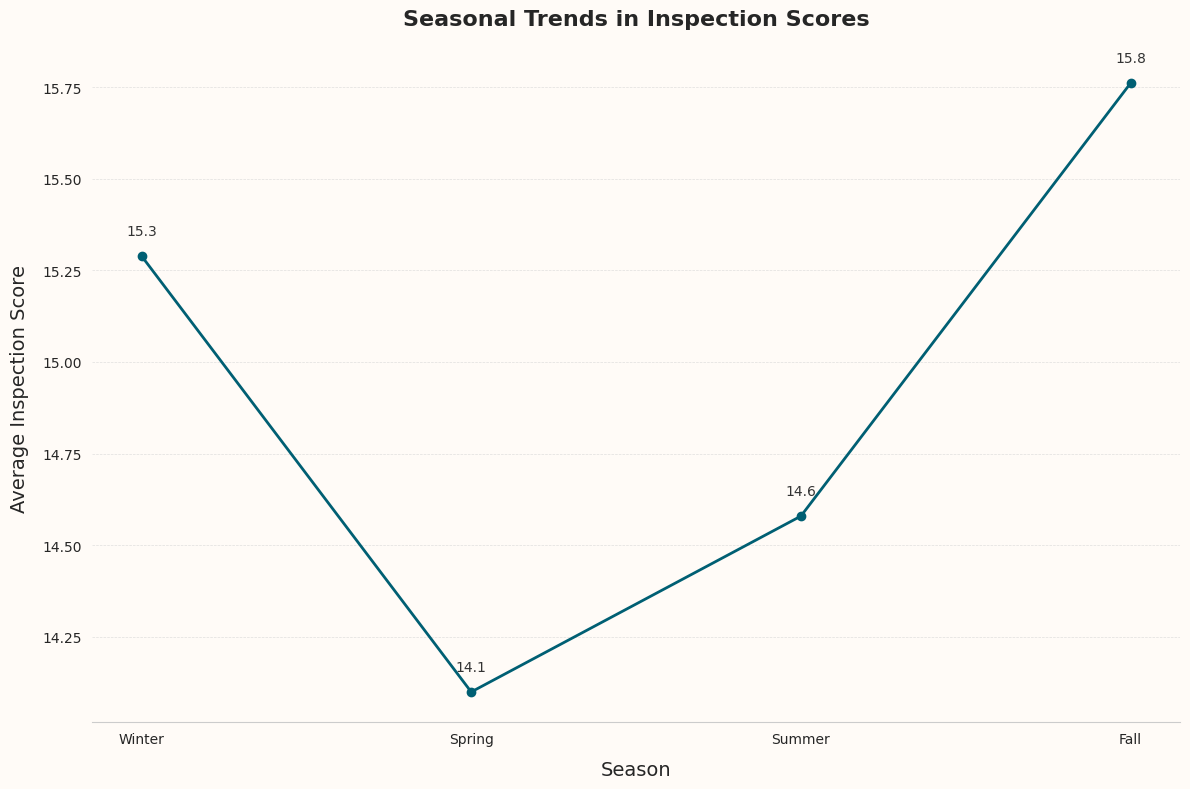

In [74]:
# Step 1: Ensure your dataset has the necessary columns
df['inspection date'] = pd.to_datetime(df['inspection date'])

# Step 2: Create a new column for seasons
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    elif date.month in [9, 10, 11]:
        return 'Fall'

df['season'] = df['inspection date'].apply(get_season)

# Step 3: Group by season and calculate the average score
seasonal_trends = df.groupby('season')['score'].mean().reindex(['Winter', 'Spring', 'Summer', 'Fall'])

# Step 4: Plot the line chart
fig, ax = plt.subplots(figsize=(12, 8))

# Set a custom background color
fig.patch.set_facecolor('#fffbf7')  # Figure background color
ax.set_facecolor('#fffbf7')        # Axis background color

# Plot the line chart
plt.plot(seasonal_trends.index, seasonal_trends.values, marker='o', linestyle='-', linewidth=2, color='#005F73')

# Add data labels
for season, score in seasonal_trends.items():
    ax.text(
        season, score + 0.05, f"{score:.1f}",
        ha='center', va='bottom', fontsize=10, color='#333333'
    )

# Customize plot
ax.set_title('Seasonal Trends in Inspection Scores', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Season', fontsize=14, labelpad=10)
ax.set_ylabel('Average Inspection Score', fontsize=14, labelpad=10)

# Add horizontal gridlines and remove vertical lines
ax.yaxis.grid(True, color="#D3D3D3", linestyle="--", linewidth=0.5, alpha=0.7)
ax.xaxis.grid(False)

# Simplify spines
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [75]:
seasonal_trends

,score
season,
Winter,15.289182
Spring,14.099495
Summer,14.579364
Fall,15.760731


# **Customer Insights**

## **8. Are there specific types of violations that result in higher public complaints?**

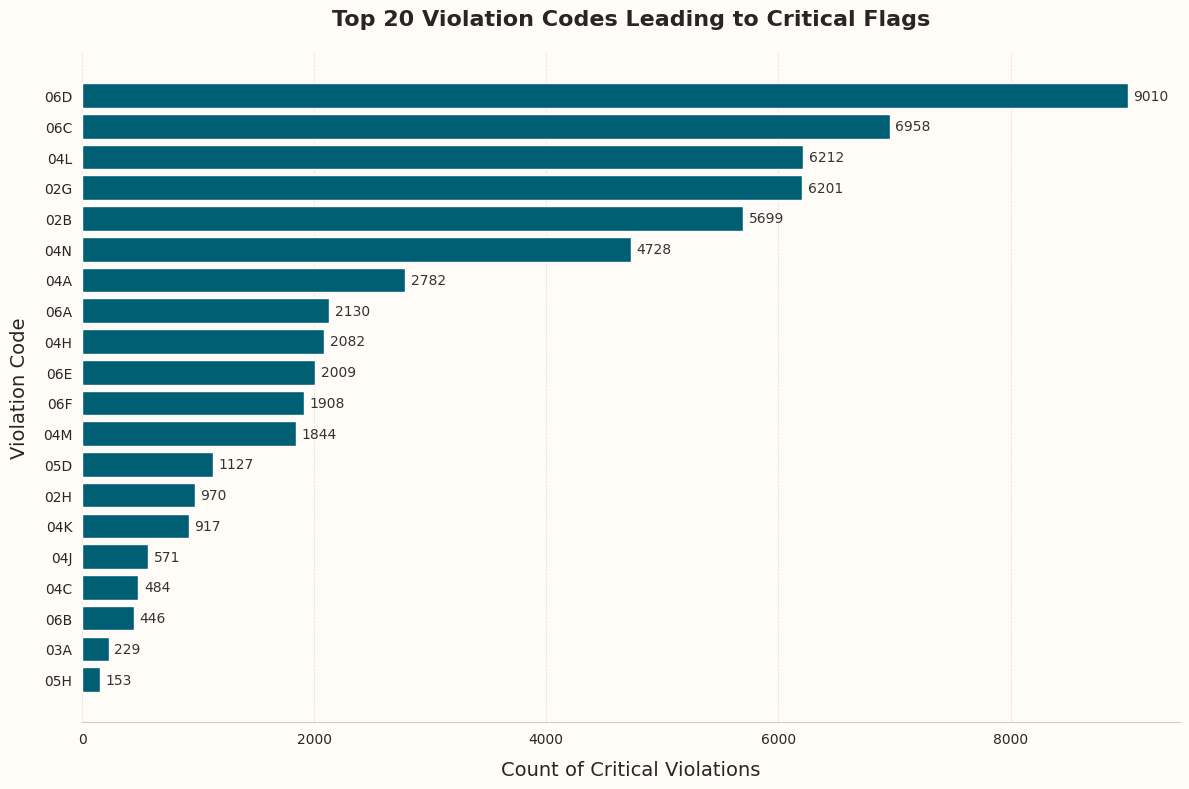

In [76]:
# Step 1: Filter for critical violations (if using critical flag as proxy for complaints)
critical_violations = df[df['critical flag'] == 'Critical']

# Step 2: Count occurrences of each violation code and pick the top 20
violation_counts = critical_violations['violation code'].value_counts().head(20)

# Step 3: Plot the horizontal bar chart for the top 20
fig, ax = plt.subplots(figsize=(12, 8))

# Set a custom background color
fig.patch.set_facecolor('#fffbf7')  # Figure background color
ax.set_facecolor('#fffbf7')        # Axis background color

# Plot the horizontal bar chart
bars = ax.barh(violation_counts.index, violation_counts.values, color='#005F73')

# Add data labels
for bar in bars:
    width = bar.get_width()
    ax.text(
        width + 50, bar.get_y() + bar.get_height() / 2,  # Offset slightly to the right of the bar
        f"{int(width)}",
        ha='left', va='center', fontsize=10, color='#333333'
    )

# Customize plot
ax.set_title('Top 20 Violation Codes Leading to Critical Flags', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Count of Critical Violations', fontsize=14, labelpad=10)
ax.set_ylabel('Violation Code', fontsize=14, labelpad=10)
ax.invert_yaxis()  # Invert the y-axis to show the highest count at the top

# Add horizontal gridlines for readability
ax.xaxis.grid(True, color="#D3D3D3", linestyle="--", linewidth=0.5, alpha=0.7)
ax.yaxis.grid(False)

# Simplify spines
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [77]:
violation_counts = critical_violations[['violation code', 'violation description']].value_counts().head(20)
violation_counts

,,count
violation code,violation description,
06D,"Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.",9010
02G,Cold TCS food item held above 41 °F; smoked or processed fish held above 38 °F; intact raw eggs held above 45 °F; or reduced oxygen packaged (ROP) TCS foods held above required temperatures except during active necessary preparation.,5018
04L,Evidence of mice or live mice in establishment's food or non-food areas.,4664
02B,Hot TCS food item not held at or above 140 °F.,4576
06C,"Food, supplies, or equipment not protected from potential source of contamination during storage, preparation, transportation, display, service or from customer’s refillable, reusable container. Condiments not in single-service containers or dispensed directly by the vendor.",3639
04N,"Filth flies or food/refuse/sewage associated with (FRSA) flies or other nuisance pests in establishment’s food and/or non-food areas. FRSA flies include house flies, blow flies, bottle flies, flesh flies, drain flies, Phorid flies and fruit flies.",2395
04A,Food Protection Certificate (FPC) not held by manager or supervisor of food operations.,2156
04H,"Raw, cooked or prepared food is adulterated, contaminated, cross-contaminated, or not discarded in accordance with HACCP plan.",2082
06E,"Sanitized equipment or utensil, including in-use food dispensing utensil, improperly used or stored.",2009


## **9. What is the distribution of cuisine types in NYC, and how do their inspection grades vary?**

<ipython-input-78-da9248d3a641>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)


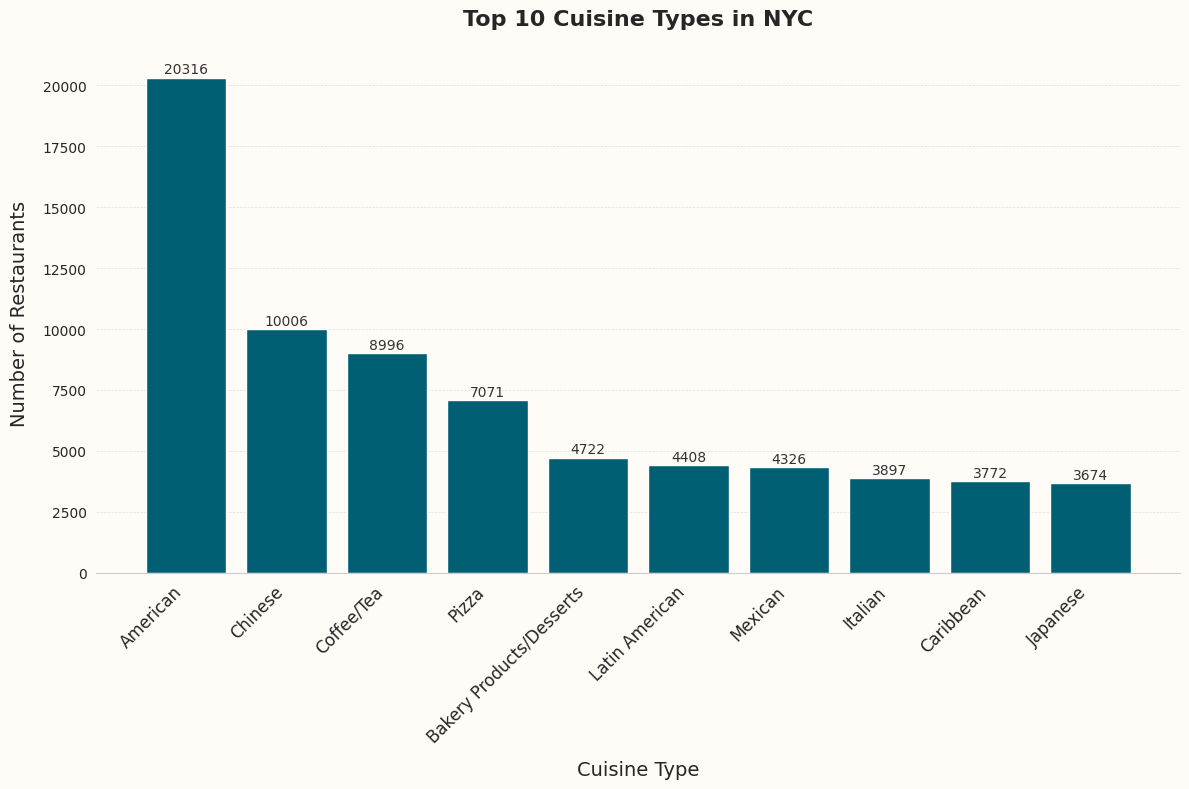

In [78]:
# Step 1: Count the number of restaurants for each cuisine type
cuisine_counts = df['cuisine description'].value_counts().head(10)  # Top 10 cuisines

# Step 2: Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Set a custom background color
fig.patch.set_facecolor('#fffbf7')  # Figure background color
ax.set_facecolor('#fffbf7')        # Axis background color

# Plot the bar chart
bars = ax.bar(cuisine_counts.index, cuisine_counts.values, color='#005F73', width=0.8)

# Add data labels
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, height + 50,  # Offset slightly above the bar
        f"{int(height)}",
        ha='center', va='bottom', fontsize=10, color='#333333'
    )

# Customize plot
ax.set_title('Top 10 Cuisine Types in NYC', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Cuisine Type', fontsize=14, labelpad=10)
ax.set_ylabel('Number of Restaurants', fontsize=14, labelpad=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Add horizontal gridlines and remove vertical lines
ax.yaxis.grid(True, color="#D3D3D3", linestyle="--", linewidth=0.5, alpha=0.7)
ax.xaxis.grid(False)

# Simplify spines
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [79]:
cuisine_counts

,count
cuisine description,
American,20316
Chinese,10006
Coffee/Tea,8996
Pizza,7071
Bakery Products/Desserts,4722
Latin American,4408
Mexican,4326
Italian,3897
Caribbean,3772


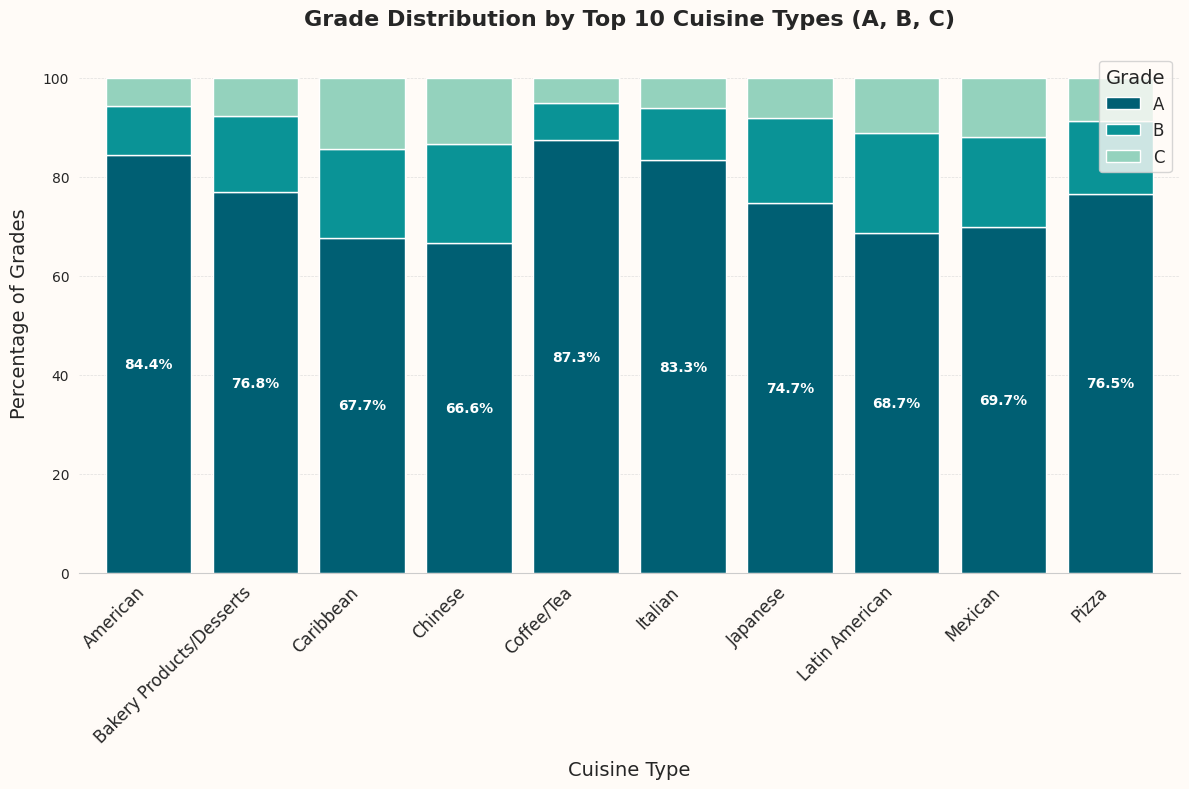

In [80]:
# Step 1: Filter the dataset to include only the top 10 cuisines
top_cuisines = cuisine_counts.index
filtered_df = df[df['cuisine description'].isin(top_cuisines)]

# Step 2: Filter for grades A, B, and C
filtered_df = filtered_df[filtered_df['grade'].isin(['A', 'B', 'C'])]

# Step 3: Create a pivot table for grades
grade_distribution = pd.crosstab(filtered_df['cuisine description'], filtered_df['grade'], normalize='index') * 100

# Step 4: Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Set a custom background color
fig.patch.set_facecolor('#fffbf7')  # Figure background color
ax.set_facecolor('#fffbf7')        # Axis background color

# Define custom color palette for grades
colors = ['#005F73', '#0A9396', '#94D2BD']  # Custom colors for A, B, C

# Plot the stacked bar chart
grade_distribution.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.8)

# Add data labels for Grade A only
for i, cuisine in enumerate(grade_distribution.index):
    cumulative = 0
    for grade in grade_distribution.columns:
        percentage = grade_distribution.loc[cuisine, grade]
        if grade == 'A' and percentage > 0:
            ax.text(
                i,
                cumulative + percentage / 2,  # Place in the middle of the Grade A segment
                f"{percentage:.1f}%",
                ha='center',
                va='center',
                fontsize=10,
                fontweight='bold',
                color='white'  # Contrast for readability
            )
        cumulative += percentage

# Customize plot
ax.set_title('Grade Distribution by Top 10 Cuisine Types (A, B, C)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Cuisine Type', fontsize=14, labelpad=10)
ax.set_ylabel('Percentage of Grades', fontsize=14, labelpad=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.legend(title='Grade', fontsize=12, title_fontsize=14, loc='upper right')

# Add horizontal gridlines and remove vertical lines
ax.yaxis.grid(True, color="#D3D3D3", linestyle="--", linewidth=0.5, alpha=0.7)
ax.xaxis.grid(False)

# Simplify spines
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [81]:
grade_distribution

grade,A,B,C
cuisine description,,,
American,84.399939,9.835816,5.764245
Bakery Products/Desserts,76.820443,15.332429,7.847128
Caribbean,67.687943,17.872340,14.439716
Chinese,66.626924,19.997832,13.375244
Coffee/Tea,87.293070,7.592191,5.114739
Italian,83.267143,10.484512,6.248345
Japanese,74.679860,17.083818,8.236321
Latin American,68.659942,20.076849,11.263208
Mexican,69.721020,18.205868,12.073112


---

# **Policy and Public Health**

## **10.What types of violations are most strongly associated with closures?**

In [82]:
# Step 1: Filter for closures
closures_df = df[df['action'].str.contains('closed', case=False, na=False)]

# Step 2: Count occurrences of each violation code (absolute counts, no normalization)
violation_closures = closures_df[['violation code', 'violation description']]
violation_closures


,violation code,violation description
50688,04N,Filth flies or food/refuse/sewage associated w...
50689,05F,"Insufficient or no hot holding, cold storage o..."
50690,04A,Food Protection Certificate (FPC) not held by ...
50691,06C,"Food, supplies, or equipment not protected fro..."
50692,02G,Cold TCS food item held above 41 °F; smoked or...
50693,02B,Hot TCS food item not held at or above 140 °F.
50694,10F,Non-food contact surface or equipment made of ...
50695,08A,Establishment is not free of harborage or cond...
50696,02H,"After cooking or removal from hot holding, TCS..."
50697,08B,Garbage receptacle not pest or water resistant...


In [83]:
# Step 1: Filter for closures
closures_df = df[df['action'].str.contains('closed', case=False, na=False)]

# Step 2: Count occurrences of each violation code in the original dataframe
total_violation_counts = df['violation code'].value_counts().reset_index()
total_violation_counts.columns = ['violation code', 'total count']

# Step 3: Merge the total counts back with the descriptions from the closures dataframe
violation_closures = closures_df[['violation code', 'violation description']].drop_duplicates()
violation_closures_with_counts = violation_closures.merge(total_violation_counts, on='violation code', how='left')

violation_closures_with_counts


,violation code,violation description,total count
0,04N,Filth flies or food/refuse/sewage associated w...,4728
1,05F,"Insufficient or no hot holding, cold storage o...",84
2,04A,Food Protection Certificate (FPC) not held by ...,2782
3,06C,"Food, supplies, or equipment not protected fro...",6958
4,02G,Cold TCS food item held above 41 °F; smoked or...,6201
5,02B,Hot TCS food item not held at or above 140 °F.,5699
6,10F,Non-food contact surface or equipment made of ...,23431
7,08A,Establishment is not free of harborage or cond...,10801
8,02H,"After cooking or removal from hot holding, TCS...",970
9,08B,Garbage receptacle not pest or water resistant...,565


## **11.Are there disparities in inspection results based on location (e.g., underserved vs. affluent neighborhoods)?**

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114796 entries, 0 to 114795
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   camis                  114796 non-null  int64         
 1   dba                    114796 non-null  object        
 2   boro                   114796 non-null  object        
 3   building               114796 non-null  object        
 4   street                 114796 non-null  object        
 5   zipcode                114796 non-null  object        
 6   cuisine description    114796 non-null  category      
 7   inspection date        114796 non-null  datetime64[ns]
 8   action                 114796 non-null  object        
 9   violation code         114796 non-null  object        
 10  violation description  114796 non-null  object        
 11  critical flag          114796 non-null  category      
 12  score                  114796 non-null  floa

In [85]:
df['score'].sort_values(ascending=False)

,score
94014,154.0
94005,154.0
94006,154.0
94007,154.0
94008,154.0
...,...
12728,0.0
12727,0.0
12726,0.0
12725,0.0


In [86]:
df['zipcode'].unique()


array(['10462.0', '10019.0', '11224.0', '11234.0', '11226.0', '10460.0',
       '10065.0', '11223.0', '11356.0', '11106.0', '10025.0', '10012.0',
       '11368.0', '11203.0', '10018.0', '10314.0', '10305.0', '11212.0',
       '11230.0', '10458.0', '11209.0', '11211.0', '10022.0', '10003.0',
       '10014.0', '10013.0', '11385.0', '10009.0', '11201.0', '10011.0',
       '11414.0', '11363.0', '10309.0', '10028.0', '10017.0', '10451.0',
       '11372.0', '11204.0', '10036.0', 'Unknown', '11103.0', '10001.0',
       '11001.0', '11435.0', '11432.0', '11694.0', '11215.0', '10302.0',
       '11229.0', '10005.0', '11420.0', '11697.0', '11235.0', '10463.0',
       '10006.0', '10310.0', '11373.0', '10304.0', '11238.0', '10010.0',
       '10465.0', '11105.0', '11377.0', '10021.0', '11415.0', '10023.0',
       '11354.0', '10301.0', '10306.0', '11218.0', '11228.0', '11361.0',
       '11366.0', '11367.0', '11358.0', '10128.0', '10464.0', '11239.0',
       '10007.0', '11213.0', '10467.0', '11104.0', 

In [87]:
# Perform data cleaning steps to handle missing or inconsistent values
df['zipcode'] = pd.to_numeric(df['zipcode'], errors='coerce')  # Convert to numeric, set invalid values to NaN
df = df.dropna(subset=['zipcode'])  # Drop rows with NaN in ZIP codes


In [88]:
df['zipcode'] = df['zipcode'].astype(int).astype(str).str.zfill(5)


<ipython-input-88-7c63b3c13f8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zipcode'] = df['zipcode'].astype(int).astype(str).str.zfill(5)


In [89]:
import pandas as pd
import plotly.express as px

# Step 1: Clean and convert ZIP codes
df['zipcode'] = pd.to_numeric(df['zipcode'], errors='coerce')  # Convert to numeric, invalid values become NaN
df = df.dropna(subset=['zipcode'])  # Drop rows with invalid ZIP codes
df['zipcode'] = df['zipcode'].astype(int).astype(str).str.zfill(5)  # Convert to 5-digit string format

# Debugging: Check converted ZIP codes
print("Converted Data ZIP Codes:", df['zipcode'].unique()[:5])

# Step 2: Aggregate inspection results by ZIP code
# Calculate average score and count of unique restaurants
zip_results = df.groupby('zipcode').agg(
    average_score=('score', 'mean'),
    unique_restaurants=('dba', 'nunique')  # Count unique restaurants
).reset_index()

# Step 3: Calculate a weighted score
# Weight the average scores by the number of unique restaurants
zip_results['weighted_score'] = zip_results['average_score'] * zip_results['unique_restaurants']
total_restaurants = zip_results['unique_restaurants'].sum()
zip_results['weighted_average_score'] = (zip_results['weighted_score'] / total_restaurants) * 100


# Step 4: Filter zip codes with very few restaurants to avoid outliers
threshold = 10  # Minimum number of unique restaurants to include
filtered_zip_results = zip_results[zip_results['unique_restaurants'] >= threshold]

# Step 5: Create the choropleth map
geojson_url = 'https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/ny_new_york_zip_codes_geo.min.json'

# Define the updated custom color scale
custom_color_scale = [
    [0.0, '#F7C66A'],  # Lightest color for the lowest score
    [0.5, '#CA6702'],  # Mid-range score
    [1.0, '#9B2226']   # Highest score
]

# Create the choropleth map with the new color scale
fig = px.choropleth_mapbox(
    filtered_zip_results,
    geojson=geojson_url,
    locations='zipcode',
    color='weighted_average_score',
    color_continuous_scale=custom_color_scale,
    featureidkey='properties.ZCTA5CE10',
    zoom=10,
    center={'lat': 40.7128, 'lon': -74.0060},
    mapbox_style="carto-positron",
    hover_data={
        'zipcode': True,
        'average_score': ':.2f',
        'unique_restaurants': True,
        'weighted_average_score': ':.2f'
    }
)

# Customize layout
fig.update_layout(
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
    coloraxis_colorbar=dict(
        title="Weighted Average Score",
        title_font=dict(size=14),
        tickfont=dict(size=12),
        lenmode="fraction",
        len=0.7
    )
)

fig.show()


<ipython-input-89-c6581b67f368>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zipcode'] = pd.to_numeric(df['zipcode'], errors='coerce')  # Convert to numeric, invalid values become NaN


Converted Data ZIP Codes: ['10462' '10019' '11224' '11234' '11226']


In [90]:
zip_results.sort_values(by='weighted_average_score', ascending=False)

,zipcode,average_score,unique_restaurants,weighted_score,weighted_average_score
3,10003,14.532814,577,8385.433815,36.608023
12,10013,16.900678,438,7402.497008,32.316847
34,10036,14.282711,512,7312.748177,31.925034
17,10019,13.891441,522,7251.331942,31.656911
1,10001,14.317595,498,7130.162228,31.127924
...,...,...,...,...,...
60,10154,7.666667,1,7.666667,0.033470
49,10107,7.000000,1,7.000000,0.030560
52,10115,7.000000,1,7.000000,0.030560
69,10173,7.000000,1,7.000000,0.030560


In [91]:
unique_restaurant_counts = zip_results['unique_restaurants'].value_counts(bins=[0, 5, 10, 20, 50, 100, float('inf')])
unique_restaurant_counts


,count
"(100.0, inf]",82
"(50.0, 100.0]",50
"(20.0, 50.0]",36
"(-0.001, 5.0]",34
"(10.0, 20.0]",14
"(5.0, 10.0]",4


In [92]:
low_sample_zip_scores = zip_results[zip_results['unique_restaurants'] < 10]['average_score']
low_sample_zip_scores.describe()


,average_score
count,38.000000
mean,10.036163
std,3.403718
min,4.666667
25%,7.678571
50%,9.213768
75%,11.295455
max,23.000000


## **12. How does restaurant compliance vary by ownership type (e.g., independent vs. chain)?**

In [93]:
# Remove duplicate CAMIS entries to count unique establishments
unique_camis_df = df.drop_duplicates(subset=['camis'])

# Count the number of unique CAMIS IDs for each DBA
top_chains = unique_camis_df['dba'].value_counts()

# Define the NYC-specific threshold for a chain (e.g., 5 or more locations)
threshold = 5

# Classify restaurants based on the NYC threshold
chain_status = top_chains.apply(lambda x: "Chain" if x >= threshold else "Independent")

# Map the classification back to the original DataFrame
df['Chain_Status'] = df['dba'].map(chain_status)

# Display the first few rows to check
df.head()


,camis,dba,boro,building,street,zipcode,cuisine description,inspection date,action,violation code,...,inspection type,latitude,longitude,location point1,time_diff,cumulative_days,operational_years,duration_category,season,Chain_Status
0,30075445,Morris Park Bake Shop,Bronx,1007,MORRIS PARK AVENUE,10462,Bakery Products/Desserts,2023-02-03,Establishment re-opened by DOHMH.,02G,...,Cycle Inspection / Reopening Inspection,40.848231,-73.855972,NaN,0.0,0.0,0.000000,Short-lived (≤ 1 year),Winter,Independent
1,30075445,Morris Park Bake Shop,Bronx,1007,MORRIS PARK AVENUE,10462,Bakery Products/Desserts,2023-02-03,Establishment re-opened by DOHMH.,10F,...,Cycle Inspection / Reopening Inspection,40.848231,-73.855972,NaN,0.0,0.0,0.000000,Short-lived (≤ 1 year),Winter,Independent
2,30075445,Morris Park Bake Shop,Bronx,1007,MORRIS PARK AVENUE,10462,Bakery Products/Desserts,2023-08-22,Violations were cited in the following area(s).,08C,...,Cycle Inspection / Re-inspection,40.848231,-73.855972,NaN,200.0,200.0,0.547945,Short-lived (≤ 1 year),Summer,Independent
3,30075445,Morris Park Bake Shop,Bronx,1007,MORRIS PARK AVENUE,10462,Bakery Products/Desserts,2023-08-22,Violations were cited in the following area(s).,08A,...,Cycle Inspection / Re-inspection,40.848231,-73.855972,NaN,0.0,200.0,0.547945,Short-lived (≤ 1 year),Summer,Independent
4,30075445,Morris Park Bake Shop,Bronx,1007,MORRIS PARK AVENUE,10462,Bakery Products/Desserts,2023-08-22,Violations were cited in the following area(s).,04L,...,Cycle Inspection / Re-inspection,40.848231,-73.855972,NaN,0.0,200.0,0.547945,Short-lived (≤ 1 year),Summer,Independent


In [94]:
# Check the number of unique CAMIS IDs per DBA
unique_counts = unique_camis_df['dba'].value_counts()
print(unique_counts)


dba
Dunkin'                             429
Starbucks                           207
Subway                              180
Mcdonald'S                          161
Popeyes                             119
                                   ... 
Mermaid Oyster Bar                    1
Alfie'S Pizza And Pasta               1
Chen Xin Lung Chinese Restaurant      1
Noel'S Pizza                          1
Pino'S Pizzeria                       1
Name: count, Length: 18871, dtype: int64


In [95]:
# Display basic statistics and explore the first few rows of the data
# Filter the DataFrame to include only rows classified as "Chain"
chain_restaurants = df[df['Chain_Status'] == "Chain"]

# Display the first few rows of the filtered DataFrame
chain_restaurants.head()


,camis,dba,boro,building,street,zipcode,cuisine description,inspection date,action,violation code,...,inspection type,latitude,longitude,location point1,time_diff,cumulative_days,operational_years,duration_category,season,Chain_Status
38,40359705,Nathan'S Famous,Brooklyn,1310,SURF AVENUE,11224,Hotdogs,2022-02-10,Violations were cited in the following area(s).,10B,...,Cycle Inspection / Initial Inspection,40.575537,-73.981652,NaN,0.0,0.0,0.000000,Short-lived (≤ 1 year),Winter,Chain
39,40359705,Nathan'S Famous,Brooklyn,1310,SURF AVENUE,11224,Hotdogs,2022-02-10,Violations were cited in the following area(s).,06D,...,Cycle Inspection / Initial Inspection,40.575537,-73.981652,NaN,0.0,0.0,0.000000,Short-lived (≤ 1 year),Winter,Chain
40,40359705,Nathan'S Famous,Brooklyn,1310,SURF AVENUE,11224,Hotdogs,2022-02-10,Violations were cited in the following area(s).,10F,...,Cycle Inspection / Initial Inspection,40.575537,-73.981652,NaN,0.0,0.0,0.000000,Short-lived (≤ 1 year),Winter,Chain
41,40359705,Nathan'S Famous,Brooklyn,1310,SURF AVENUE,11224,Hotdogs,2023-04-26,Violations were cited in the following area(s).,02G,...,Cycle Inspection / Initial Inspection,40.575537,-73.981652,NaN,440.0,440.0,1.205479,Medium-lived (1-5 years),Spring,Chain
42,40359705,Nathan'S Famous,Brooklyn,1310,SURF AVENUE,11224,Hotdogs,2023-04-26,Violations were cited in the following area(s).,10B,...,Cycle Inspection / Initial Inspection,40.575537,-73.981652,NaN,0.0,440.0,1.205479,Medium-lived (1-5 years),Spring,Chain


In [96]:
# Import necessary libraries for the analysis
import numpy as np

# Step 1: Define compliance status based on score
conditions = [
    (df['score'] <= 13),  # Grade A
    (df['score'] >= 14) & (df['score'] <= 27),  # Grade B
    (df['score'] >= 28)  # Grade C
]

choices = ['Excellent', 'Needs Improvement', 'Critical']

# Step 2: Apply conditions to create a new column
df['compliance_status'] = np.select(conditions, choices, default='Unknown')

# Step 3: Check results
print(df[['score', 'compliance_status']].head())


   score compliance_status
0   13.0         Excellent
1   13.0         Excellent
2   12.0         Excellent
3   12.0         Excellent
4   12.0         Excellent


In [97]:
# Step 1: Aggregate scores for each unique restaurant
unique_restaurants = df.groupby(['camis', 'dba', 'Chain_Status'])['score'].mean().reset_index()

# Step 2: Use the existing conditions to redefine compliance_status for unique restaurants
unique_restaurants['compliance_status'] = np.select(
    [
        (unique_restaurants['score'] <= 13),  # Grade A
        (unique_restaurants['score'] >= 14) & (unique_restaurants['score'] <= 27),  # Grade B
        (unique_restaurants['score'] >= 28)  # Grade C
    ],
    ['Excellent', 'Needs Improvement', 'Critical'],
    default='Unknown'
)


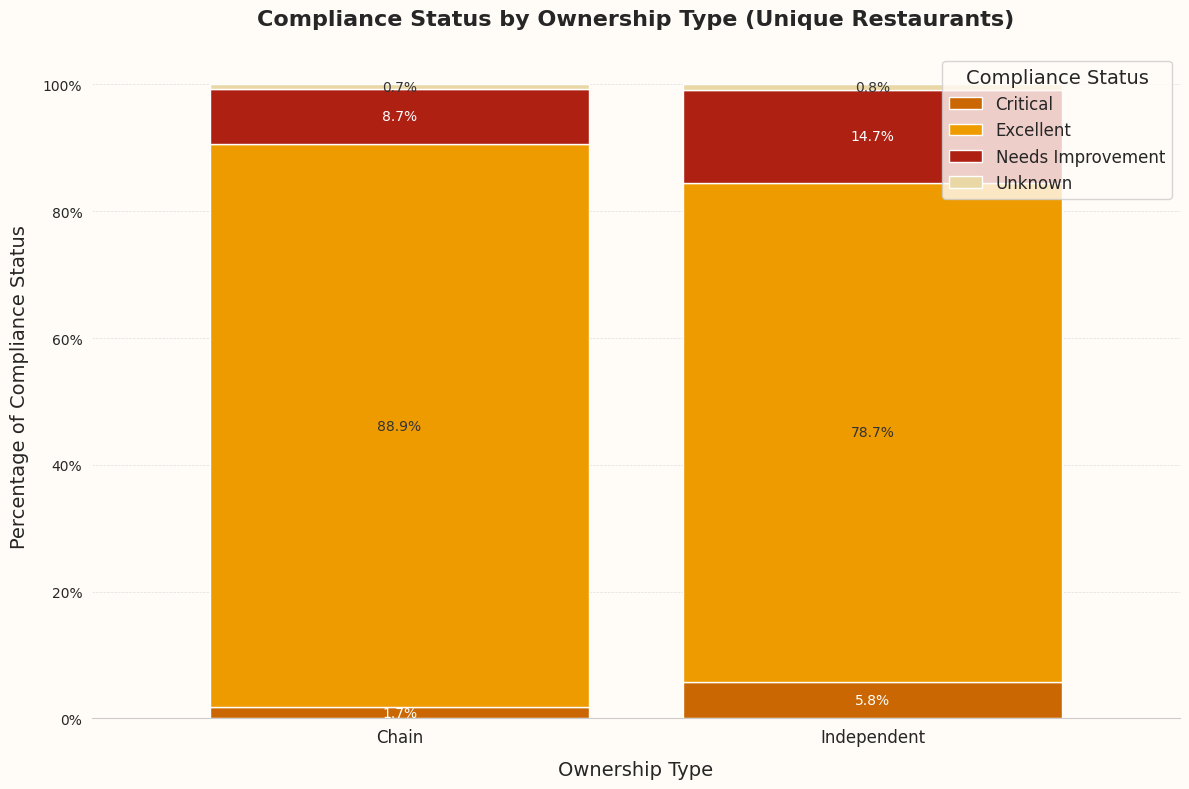

In [98]:
# Step 1: Create a pivot table for compliance by ownership type
compliance_by_ownership = unique_restaurants.pivot_table(
    index='Chain_Status',
    columns='compliance_status',
    aggfunc='size',
    fill_value=0
)

# Step 2: Normalize to show proportions
compliance_by_ownership = compliance_by_ownership.div(compliance_by_ownership.sum(axis=1), axis=0)

# Step 3: Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Set a custom background color
fig.patch.set_facecolor('#fffbf7')  # Figure background color
ax.set_facecolor('#fffbf7')        # Axis background color

# Define the custom color palette
colors = ['#CA6702', '#EE9B00', '#AE2012', '#E9D8A6']  # Excellent, Needs Improvement, Critical, Unknown

# Plot the stacked bar chart
compliance_by_ownership.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.8)

# Add data labels for each segment
for i, ownership_type in enumerate(compliance_by_ownership.index):
    cumulative = 0
    for compliance_status, value in compliance_by_ownership.loc[ownership_type].items():
        if value > 0:
            ax.text(
                i,
                cumulative + value / 2,  # Place label at the center of the segment
                f"{value * 100:.1f}%",  # Convert to percentage
                ha='center',
                va='center',
                fontsize=10,
                color='white' if compliance_status in ['Critical', 'Needs Improvement'] else '#333333'
            )
        cumulative += value

# Customize plot
ax.set_title('Compliance Status by Ownership Type (Unique Restaurants)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Ownership Type', fontsize=14, labelpad=10)
ax.set_ylabel('Percentage of Compliance Status', fontsize=14, labelpad=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=12)
ax.legend(title='Compliance Status', fontsize=12, title_fontsize=14, loc='upper right')

# Format the y-axis as percentage
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x * 100:.0f}%"))

# Add horizontal gridlines and remove vertical lines
ax.yaxis.grid(True, color="#D3D3D3", linestyle="--", linewidth=0.5, alpha=0.7)
ax.xaxis.grid(False)

# Simplify spines
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [99]:
compliance_by_ownership

compliance_status,Critical,Excellent,Needs Improvement,Unknown
Chain_Status,,,,
Chain,0.017208,0.888981,0.086872,0.006939
Independent,0.057853,0.786854,0.146873,0.008419


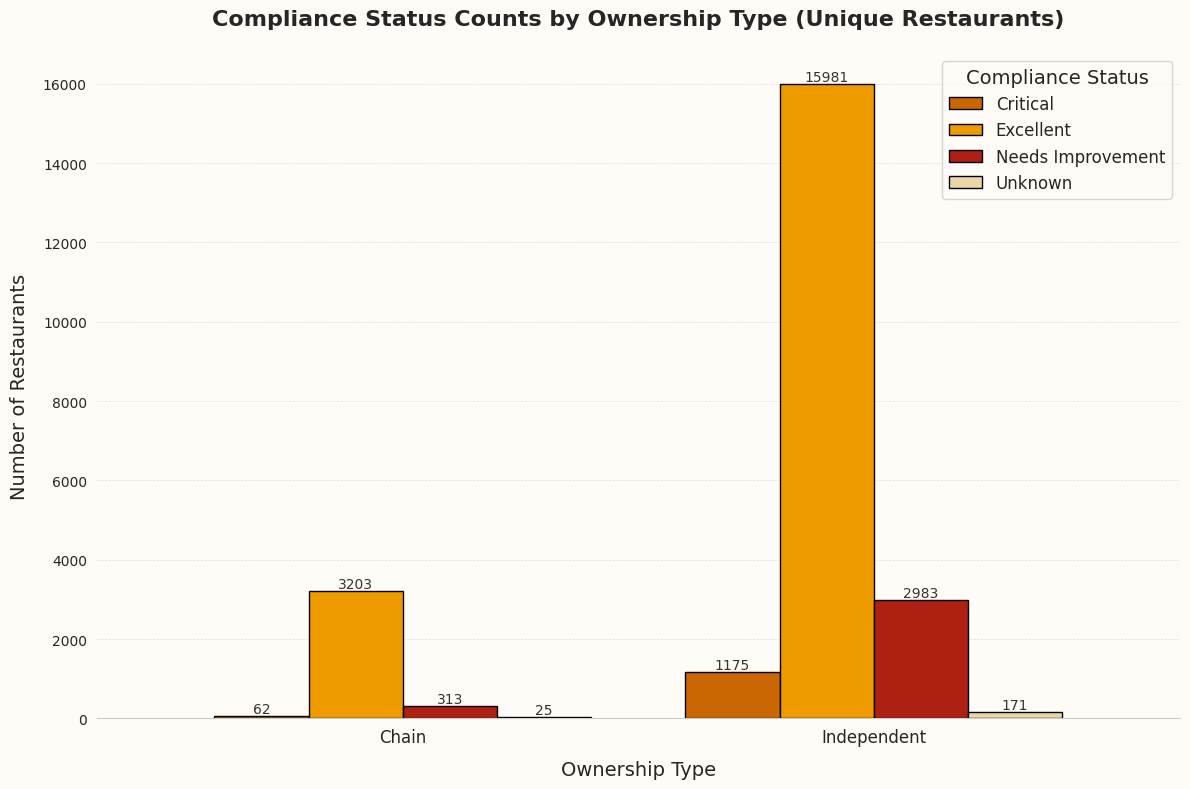

In [100]:
# Step 1: Create a pivot table for absolute counts of compliance by ownership type
compliance_counts = unique_restaurants.pivot_table(
    index='Chain_Status',
    columns='compliance_status',
    aggfunc='size',
    fill_value=0
)

# Step 2: Plot the side-by-side bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Set a custom background color
fig.patch.set_facecolor('#fffbf7')  # Figure background color
ax.set_facecolor('#fffbf7')        # Axis background color

# Define the custom color palette
colors = ['#CA6702', '#EE9B00', '#AE2012', '#E9D8A6']  # Needs Improvement, Excellent, Critical, Unknown

# Plot the side-by-side bar chart
compliance_counts.plot(kind='bar', ax=ax, color=colors, edgecolor='black', width=0.8)

# Add data labels for each bar
for i, ownership_type in enumerate(compliance_counts.index):
    for j, compliance_status in enumerate(compliance_counts.columns):
        count = compliance_counts.loc[ownership_type, compliance_status]
        if count > 0:
            ax.text(
                i + (j - len(compliance_counts.columns) / 2 + 0.5) * 0.8 / len(compliance_counts.columns),  # Adjust x position
                count + 2,  # Slightly above the bar
                f"{count}",
                ha='center',
                va='bottom',
                fontsize=10,
                color='#333333'
            )

# Customize plot
ax.set_title('Compliance Status Counts by Ownership Type (Unique Restaurants)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Ownership Type', fontsize=14, labelpad=10)
ax.set_ylabel('Number of Restaurants', fontsize=14, labelpad=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=12)
ax.legend(title='Compliance Status', fontsize=12, title_fontsize=14, loc='upper right')

# Add horizontal gridlines and remove vertical lines
ax.yaxis.grid(True, color="#D3D3D3", linestyle="--", linewidth=0.5, alpha=0.7)
ax.xaxis.grid(False)

# Simplify spines
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [101]:
compliance_counts

compliance_status,Critical,Excellent,Needs Improvement,Unknown
Chain_Status,,,,
Chain,62,3203,313,25
Independent,1175,15981,2983,171


## **13. What are the most frequent foodborne illnesses identified, and how do they vary by cuisine?**

In [102]:
# Updated mapping of violation codes to illnesses
violation_to_illness = {
    # Cooking Temperatures
    '02A': 'Salmonella, E. coli, Clostridium perfringens, Bacillus cereus, Botulism',
    '02B': 'Salmonella, E. coli, Clostridium perfringens, Bacillus cereus, Botulism',
    '02C': 'Salmonella, E. coli, Clostridium perfringens, Bacillus cereus, Botulism',
    '02G': 'Salmonella, E. coli, Clostridium perfringens, Bacillus cereus, Botulism',
    '02H': 'Salmonella, E. coli, Clostridium perfringens, Bacillus cereus, Botulism',

    # Food Source
    '03A': 'Hepatitis A, Cholera, Vibrio, E. coli',
    '03B': 'Hepatitis A, Cholera, Vibrio, E. coli',
    '03E': 'Hepatitis A, Cholera, Vibrio, E. coli',

    # Food Handling and Protection
    '04B': 'Norovirus, Hepatitis A, Shigella, Campylobacter',
    '04C': 'Norovirus, Hepatitis A, Shigella, Campylobacter',
    '04D': 'Norovirus, Hepatitis A, Shigella, Campylobacter',
    '04H': 'Norovirus, Hepatitis A, Shigella, Campylobacter',

    # Pests and Contamination
    '04K': 'Leptospirosis, Salmonella, E. coli, gastrointestinal diseases',
    '04L': 'Leptospirosis, Salmonella, E. coli, gastrointestinal diseases',
    '04M': 'Leptospirosis, Salmonella, E. coli, gastrointestinal diseases',
    '04N': 'Leptospirosis, Salmonella, E. coli, gastrointestinal diseases',

    # Chemical Contamination
    '04E': 'Chemical Poisoning',
    '04H': 'Chemical Poisoning',

    # Food Worker Hygiene
    '06A': 'Hepatitis A, Norovirus',
    '06B': 'Hepatitis A, Norovirus',

    # Unscored Violations
    '16A': 'Allergic reactions, anaphylaxis',
    '16C': 'Allergic reactions, anaphylaxis',
    '18E': 'Delays in identifying and controlling outbreaks',

    # High-Risk Violations (General Categories)
    '05C': 'General Illnesses from Improper Sanitization',

    # Default for unrelated codes
    None: 'Not Illness-Related'
}


In [103]:
# Perform data cleaning steps to handle missing or inconsistent values
# Map violation codes to illnesses
df['illness_type'] = df['violation code'].map(violation_to_illness).fillna('Not Illness-Related')

# Check the first few rows to ensure mapping worked
df[['violation code', 'violation description', 'illness_type']]


,violation code,violation description,illness_type
0,02G,Cold TCS food item held above 41 °F; smoked or...,"Salmonella, E. coli, Clostridium perfringens, ..."
1,10F,Non-food contact surface or equipment made of ...,Not Illness-Related
2,08C,Pesticide not properly labeled or used by unli...,Not Illness-Related
3,08A,Establishment is not free of harborage or cond...,Not Illness-Related
4,04L,Evidence of mice or live mice in establishment...,"Leptospirosis, Salmonella, E. coli, gastrointe..."
...,...,...,...
114791,06C,"Food, supplies, or equipment not protected fro...",Not Illness-Related
114792,10F,Non-food contact surface or equipment made of ...,Not Illness-Related
114793,04N,Filth flies or food/refuse/sewage associated w...,"Leptospirosis, Salmonella, E. coli, gastrointe..."
114794,06C,"Food, supplies, or equipment not protected fro...",Not Illness-Related


In [104]:
# Group by cuisine and illness type to calculate frequencies
illness_by_cuisine = df.groupby(['cuisine description', 'illness_type']).size().unstack(fill_value=0)

# Display the table for review
illness_by_cuisine


<ipython-input-104-1c9e356685eb>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



illness_type,Chemical Poisoning,General Illnesses from Improper Sanitization,"Hepatitis A, Cholera, Vibrio, E. coli","Hepatitis A, Norovirus","Leptospirosis, Salmonella, E. coli, gastrointestinal diseases","Norovirus, Hepatitis A, Shigella, Campylobacter",Not Illness-Related,"Salmonella, E. coli, Clostridium perfringens, Bacillus cereus, Botulism"
cuisine description,,,,,,,,
Afghan,0,0,0,3,15,0,50,5
African,3,0,0,5,69,0,249,68
American,581,7,23,401,2160,153,14649,1906
Armenian,0,0,0,0,2,0,14,1
Asian/Asian Fusion,30,0,4,55,192,15,1201,258
...,...,...,...,...,...,...,...,...
Tex-Mex,17,2,1,36,162,5,1239,157
Thai,23,0,8,29,204,6,928,233
Turkish,3,0,1,9,37,1,226,30


In [105]:
# Count the number of non-illness-related violations
non_illness_violations = df[df['illness_type'] == 'Not Illness-Related'].groupby('violation code').size()

# Display non-illness-related violations
print(non_illness_violations)


violation code
02D          8
02F         31
02I         73
03C         22
03D          1
03F          1
03G          2
03I         50
04A       2754
04F         35
04I          2
04J        562
04O        149
04P         16
05A         44
05B         31
05D       1118
05E         23
05F         83
05H        151
06C       6904
06D       8907
06E       1984
06F       1887
06G         22
06H          3
06I          2
07A          2
08A      10684
08B        558
08C       2300
09A        305
09B       1163
09C       2150
09D         10
09E        574
10A        543
10B       8288
10C        116
10D        767
10E       1064
10F      23136
10G       2019
10H       1953
10I        399
10J        138
18-11        2
22F          1
22G          1
28-05      133
28-06      314
28-07        3
dtype: int64


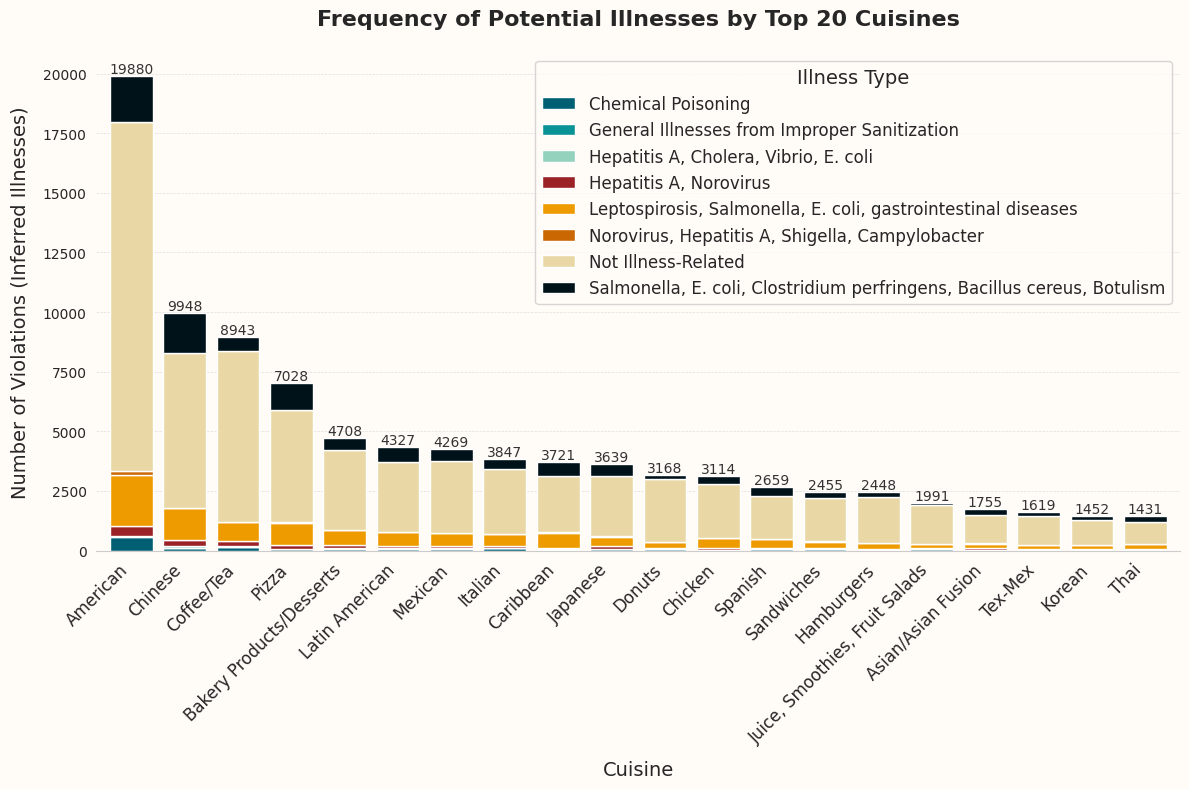

In [106]:
# Step 1: Calculate total violations per cuisine
total_violations = illness_by_cuisine.sum(axis=1)

# Step 2: Select the top 20 cuisines based on total violations
top_20_cuisines = total_violations.nlargest(20).index

# Step 3: Filter the illness_by_cuisine DataFrame to include only the top 20 cuisines
top_illness_by_cuisine = illness_by_cuisine.loc[top_20_cuisines]

# Step 4: Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Set a custom background color
fig.patch.set_facecolor('#fffbf7')  # Figure background color
ax.set_facecolor('#fffbf7')        # Axis background color

# Define the custom color palette
colors = ['#005F73', '#0A9396', '#94D2BD', '#9B2226', '#EE9B00', '#CA6702', '#E9D8A6', '#001219']

# Plot the stacked bar chart
top_illness_by_cuisine.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.8)

# Add data labels for total violations
for i, cuisine in enumerate(top_illness_by_cuisine.index):
    total = total_violations.loc[cuisine]
    ax.text(
        i, total + 2,  # Position slightly above the stacked bars
        f"{total}",
        ha='center',
        va='bottom',
        fontsize=10,
        color='#333333'
    )

# Customize plot
ax.set_title('Frequency of Potential Illnesses by Top 20 Cuisines', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Cuisine', fontsize=14, labelpad=10)
ax.set_ylabel('Number of Violations (Inferred Illnesses)', fontsize=14, labelpad=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.legend(title='Illness Type', fontsize=12, title_fontsize=14, loc='upper right')

# Add horizontal gridlines and remove vertical lines
ax.yaxis.grid(True, color="#D3D3D3", linestyle="--", linewidth=0.5, alpha=0.7)
ax.xaxis.grid(False)

# Simplify spines
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [107]:
top_illness_by_cuisine

illness_type,Chemical Poisoning,General Illnesses from Improper Sanitization,"Hepatitis A, Cholera, Vibrio, E. coli","Hepatitis A, Norovirus","Leptospirosis, Salmonella, E. coli, gastrointestinal diseases","Norovirus, Hepatitis A, Shigella, Campylobacter",Not Illness-Related,"Salmonella, E. coli, Clostridium perfringens, Bacillus cereus, Botulism"
cuisine description,,,,,,,,
American,581,7,23,401,2160,153,14649,1906
Chinese,114,11,45,275,1325,22,6490,1666
Coffee/Tea,153,5,37,185,812,13,7162,576
Pizza,65,1,6,166,928,22,4694,1146
Bakery Products/Desserts,79,0,11,122,643,16,3335,502
Latin American,84,0,25,81,575,9,2955,598
Mexican,80,3,9,78,552,27,3009,511
Italian,94,1,7,96,475,28,2723,423
Caribbean,39,1,13,57,642,4,2382,583
